In [1]:
import numpy as np
import tensorflow as tf
import os
import cv2
import glob
import json
import matplotlib.pyplot as plt
import utilFunc as uF
import network as net

C:\Users\jaekyu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jaekyu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jaekyu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jaekyu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

In [2]:
tf.test.is_gpu_available()

True

In [3]:
class CenterNet():
    def __init__(self, sess, batch_size, epochs, lr):
        self.sess = sess
        self.batch_size = batch_size
        self.learning_rate = lr
        self.epochs = epochs
        self.input_image_width = 256
        self.input_image_height = 256
        self.input_image_channel = 3
        self.train_size = 82783
        
        self.num_of_class = 91
        
        self.label_width = 64
        self.label_height = 64
        
        self.input_image = tf.placeholder(shape = [None, self.input_image_width, self.input_image_height, self.input_image_channel], dtype = tf.float32)
        self.output_heatmap = tf.placeholder(shape = [None, self.num_of_class, self.label_width, self.label_height], dtype = tf.float32)
        
        self.label_heatmap = tf.placeholder(shape = [None, self.num_of_class, self.label_width, self.label_height], dtype = tf.float32)
        
        #self.output_wh      = tf.placeholder(shape = [None, self.num_of_class*2, self.label_width, self.label_height], dtype = tf.float32)
        
        self.model()
        self.optimizer()
        

        
        
    def model(self):
        #input => 512x512x3
        #res-18 start
        x = tf.layers.conv2d(inputs = self.input_image, filters = 64, kernel_size = (7,7), strides = (2, 2), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.max_pooling2d(inputs = x, pool_size = (3, 3), strides = (2, 2), padding = "SAME")
        
        #Layer1
        residual1 = x
        x = tf.layers.conv2d(inputs = x, filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(tf.math.add(x, residual1))
        residual2 = x
        x = tf.layers.conv2d(inputs = x, filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(tf.math.add(x, residual2))
        
        #Layer2
        residual3 = tf.layers.conv2d(inputs = x, filters = 128, kernel_size = (1, 1), strides = (2, 2))
        x = tf.layers.conv2d(inputs = x, filters = 128, kernel_size = (3, 3), strides = (2, 2), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(tf.math.add(x, residual3))
        residual4 = x
        x = tf.layers.conv2d(inputs = x, filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(tf.math.add(x, residual4))
        
        
        #Layer3
        residual5 = tf.layers.conv2d(inputs = x, filters = 256, kernel_size = (1, 1), strides = (2, 2))
        x = tf.layers.conv2d(inputs = x, filters = 256, kernel_size = (3, 3), strides = (2, 2), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(tf.math.add(x, residual5))
        residual6 = x
        x = tf.layers.conv2d(inputs = x, filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(tf.math.add(x, residual6))
        
        #Layer3
        residual7 = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (1, 1), strides = (2, 2))
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (2, 2), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(tf.math.add(x, residual7))
        residual8 = x
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        #여기서부터 학습 안되서 추가한 부분.
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        x = tf.nn.relu(x)
        #여기까지 학습 안되서 추가한 부분
        x = tf.layers.conv2d(inputs = x, filters = 512, kernel_size = (3, 3), strides = (1, 1), padding = "SAME")
        resnet_output = tf.nn.relu(tf.math.add(x, residual8))
        
        x = tf.keras.layers.Conv2DTranspose(filters = 256, kernel_size = 4, strides = 2, padding = "SAME")(resnet_output)
        x = tf.nn.relu(x)
        x = tf.keras.layers.Conv2DTranspose(filters = 256, kernel_size = 4, strides = 2, padding = "SAME")(x)
        x = tf.nn.relu(x)
        x = tf.keras.layers.Conv2DTranspose(filters = 256, kernel_size = 4, strides = 2, padding = "SAME")(x)
        transposed_output = tf.nn.relu(x)
        
        x = tf.layers.conv2d(inputs = transposed_output, filters = 64, kernel_size = (3, 3), strides = 1, padding = "SAME")
        x = tf.nn.relu(x)
        heatmap = tf.layers.conv2d(inputs = x, filters = self.num_of_class, kernel_size = (1, 1), strides = 1, padding = "SAME")
        
        transposed_heatmap = tf.transpose(heatmap, [0, 3, 1, 2])
        #tf.keras.layers.Conv2D(filters=heads["heatmap"], kernel_size=(1, 1), strides=1, padding="same")
        
        return transposed_heatmap
    
    def focal_loss(self, hm_pred, hm_true):
        pos_mask = tf.cast(tf.equal(hm_true, 1.), dtype=tf.float32)
        neg_mask = tf.cast(tf.less(hm_true, 1.), dtype=tf.float32)
        neg_weights = tf.pow(1. - hm_true, 4)

        pos_loss = -tf.log(tf.clip_by_value(hm_pred, 1e-5, 1. - 1e-5)) * tf.pow(1. - hm_pred, 2) * pos_mask
        neg_loss = -tf.log(tf.clip_by_value(1. - hm_pred, 1e-5, 1. - 1e-5)) * tf.pow(hm_pred, 2.0) * neg_weights * neg_mask

        num_pos = tf.reduce_sum(pos_mask)
        pos_loss = tf.reduce_sum(pos_loss)
        neg_loss = tf.reduce_sum(neg_loss)

        loss = tf.cond(tf.greater(num_pos, 0), lambda : (pos_loss + neg_loss) / num_pos, lambda : neg_loss)
        return loss
        
        
        
        
    def optimizer(self):
        self.predict_heatmap = self.model()
        self.heatmap_loss = self.focal_loss(self.predict_heatmap, self.label_heatmap)
        #wg_loss = 0.05*loss.reg_l1_loss(self.pred_wh, true_wh, ind, reg_mask)
        #reg_loss = loss.reg_l1_loss(self.pred_reg, true_reg, ind, reg_mask)

        #total_loss = hm_loss + wh_loss + reg_loss
        self.total_loss = self.heatmap_loss
        
        
        global_step = tf.Variable(0, trainable=False)
        starter_learning_rate = self.learning_rate#4e-2
        steps_per_epoch = tf.math.ceil(self.train_size / self.batch_size)
        lr = tf.train.exponential_decay(starter_learning_rate, global_step, steps_per_epoch*10, 0.96)
        #lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = starter_learning_rate, decay_steps = steps_per_epoch*10, decay_rate = 0.96)
        self.optimizer_total_loss = tf.train.AdamOptimizer(learning_rate=lr).minimize(self.total_loss, global_step=global_step)
        
        
        
    def train(self):
        data_size = self.train_size
        #82783#28883#41749
        batch_size = self.batch_size
        total_batch = data_size//batch_size

        total_loss_data = []
        heatmap_loss_data = []    
        
        #write = tf.summary.FileWriter('./mygraph', self.sess.graph)
        
        SAVE_PATH = "C:/Users/jaekyu/Documents/Jupyter Lab/CenterNet/Weight/Weight.ckpt"
        print("------------------------------------session start------------------------------------")
        self.sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        print("")
        print("** training data load start **")        
        img_Folder_Path_Dir = './Dataset/train2014/train2014'
        anno_Path_Dir = './Dataset/annotations_trainval2014/annotations/instances_train2014.json'
        training_Data = uF.COCO_Object_Detection_2014_TrainData_Load(img_Folder_Path_Dir, anno_Path_Dir)
        categories = uF.read_Categories_Data_From_COCO_File(path = './Dataset/annotations_trainval2014/annotations/instances_train2014.json')
        print("** training data load finish **")
        try:
            saver.restore(self.sess, SAVE_PATH)
            print("** Weight.ckpt file exist. file loaded **")
        except:
            print("** No Weight.ckpt file exist. make Weight.ckpt file. Training Start **")

        print("** Epoch Start **")
        for epoch in range(self.epochs):#15
            print("epoch",epoch+1, "start")
            for i in range(total_batch):#total_batch
                #data load, batch 생성
                
                #batch_size = 16
                batch_Img_Path, batch_Anno_Data = uF.make_Batch(training_Data, batch_size)
                batch_Img = uF.load_img(batch_Img_Path, normalize=False)
                batch_Heatmap, gaussian_Heatmap = uF.make_heatmap(img_paths = batch_Img_Path, batch_Anno_Data = batch_Anno_Data, heatmap_width = self.label_width, heatmap_height = self.label_height, num_of_class = self.num_of_class)

                batch_Img_resized = uF.img_resize(batch_Img, resize_width = self.input_image_width, resize_height = self.input_image_height)

                #batch_img_path, batch_annotation= make_batch(img_path = self.image_path, anno_data = self.annotation_data, batch_size = batch_size)
                #batch_img = path_to_image(batch_img_path, batch_size)
                ##batch_img, batch_annotation - input data

                #heatmap = make_heatmap(batch_annotation, width=44, height=44, num_of_maps=17)
                #vectormap, countmap = make_paf_field(batch_annotation, width = 44, height = 44, num_of_maps = 17)
                #print("사이즈 : ", np.shape(batch_Img_resized))

                _, _total_loss, _heat_loss = self.sess.run([self.optimizer_total_loss, self.total_loss, self.heatmap_loss],
                         feed_dict = {self.input_image : batch_Img_resized, self.label_heatmap : batch_Heatmap})

                total_loss_data.append(_total_loss)
                heatmap_loss_data.append(_heat_loss)
                #v_loss_data.append(Vector_loss)
            heatmap_output = self.sess.run([self.predict_heatmap], feed_dict = {self.input_image : batch_Img_resized})
            
            
            #plt.imshow(batch_Img_resized[0])
            #plt.show()

            
            #tmp = uF.sum_of_channel(heatmap_output)
            #for r in range(32):
            #    for c in range(32):
            #        tmp[0][r][c] = int(tmp[0][r][c])
            #plt.imshow(tmp[0])
            #plt.show()
            

            print("heatmap cost")
            print("Heat_loss : ", _heat_loss)
            print('\n')

            plt.plot(heatmap_loss_data)
            plt.show()
            saver.save(self.sess, SAVE_PATH)
            
            
    def test(self):
        SAVE_PATH = "C:/Users/jaekyu/Documents/Jupyter Lab/CenterNet/Weight/Weight.ckpt"
        print("------------------------------------session start------------------------------------")
        self.sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        print("")
        print("** test data load start **")        
        img_Folder_Path_Dir = './Dataset/train2014/train2014'
        anno_Path_Dir = './Dataset/annotations_trainval2014/annotations/instances_train2014.json'
        training_Data = uF.COCO_Object_Detection_2014_TrainData_Load(img_Folder_Path_Dir, anno_Path_Dir)
        categories = uF.read_Categories_Data_From_COCO_File(path = './Dataset/annotations_trainval2014/annotations/instances_train2014.json')
        print("** training data load finish **")
        weight_exist_flag = False
        try:
            saver.restore(self.sess, SAVE_PATH)
            weight_exist_flag = True
            print("** Weight.ckpt file exist. file loaded **")
        except:
            print("** No Weight.ckpt file exist.**")
            

        print("** Test Start **")
        if(weight_exist_flag == True):
            batch_Img_Path, batch_Anno_Data = uF.make_Batch(training_Data, self.batch_size)
            batch_Img = uF.load_img(batch_Img_Path, normalize=False)
            batch_Heatmap, gaussian_Heatmap = uF.make_heatmap(img_paths = batch_Img_Path, batch_Anno_Data = batch_Anno_Data, heatmap_width = self.label_width, heatmap_height = self.label_height, num_of_class = self.num_of_class)
            batch_Img_resized = uF.img_resize(batch_Img, resize_width = self.input_image_width, resize_height = self.input_image_height)
            
            predicted_heatmap = self.sess.run([self.predict_heatmap], feed_dict = {self.input_image : batch_Img_resized, self.label_heatmap : batch_Heatmap})
            
                
        return batch_Img_resized, predicted_heatmap[0], batch_Heatmap, batch_Anno_Data, categories
    
    def data_test(self):
        data_size = self.train_size
        #82783#28883#41749
        batch_size = self.batch_size
        print("** training data load start **")        
        img_Folder_Path_Dir = './Dataset/train2014/train2014'
        anno_Path_Dir = './Dataset/annotations_trainval2014/annotations/instances_train2014.json'
        training_Data = uF.COCO_Object_Detection_2014_TrainData_Load(img_Folder_Path_Dir, anno_Path_Dir)
        categories = uF.read_Categories_Data_From_COCO_File(path = './Dataset/annotations_trainval2014/annotations/instances_train2014.json')
        print("** training data load finish **")
        
        #batch_size = 16
        batch_Img_Path, batch_Anno_Data = uF.make_Batch(training_Data, batch_size)
        batch_Img = uF.load_img(batch_Img_Path, normalize=False)
        batch_Heatmap, gaussian_Heatmap = uF.make_heatmap(img_paths = batch_Img_Path, batch_Anno_Data = batch_Anno_Data, heatmap_width = self.label_width, heatmap_height = self.label_height, num_of_class = self.num_of_class)

        batch_Img_resized = uF.img_resize(batch_Img, resize_width = self.input_image_width, resize_height = self.input_image_height)

        return batch_Img_resized, batch_Anno_Data, batch_Heatmap, gaussian_Heatmap, categories

            
            
            
        
print("cell load end")

cell load end


Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
------------------------------------session start------------------------------------

** training data load start **
** training data load finish **
Instructions for updating:
Use standard file APIs to check for files with this prefix.
** No Weight.ckpt file exist. make Weight.ckpt file. Training Start **
** Epoch Start **
epoch 1 start
heatmap cost
Heat_loss :  4.748967




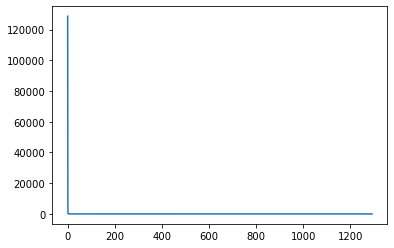

epoch 2 start
heatmap cost
Heat_loss :  3.8365564




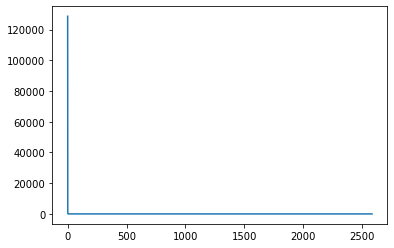

epoch 3 start
heatmap cost
Heat_loss :  3.9860594




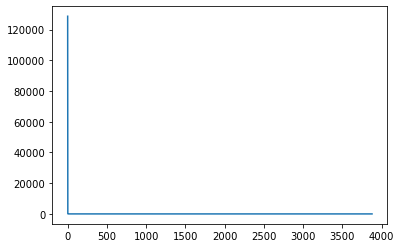

epoch 4 start
heatmap cost
Heat_loss :  3.7748742




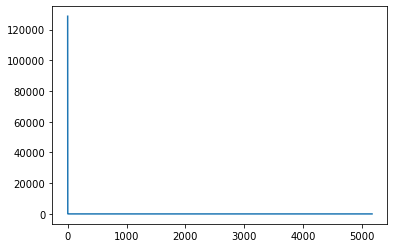

epoch 5 start
heatmap cost
Heat_loss :  3.4485495




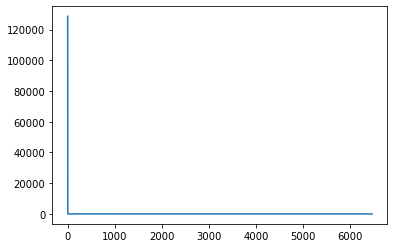

epoch 6 start
heatmap cost
Heat_loss :  3.4537747




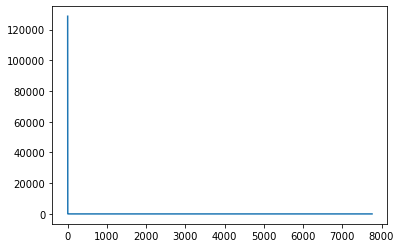

epoch 7 start
heatmap cost
Heat_loss :  3.2408917




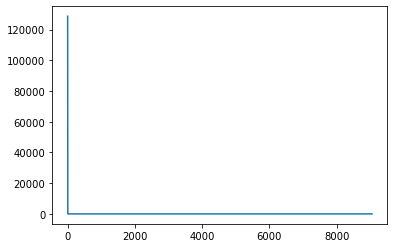

epoch 8 start
heatmap cost
Heat_loss :  3.4380827




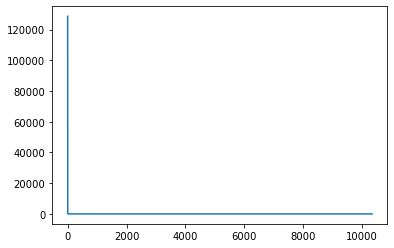

epoch 9 start
heatmap cost
Heat_loss :  3.1048388




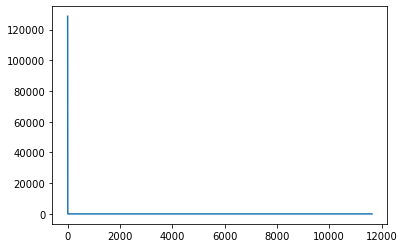

epoch 10 start
heatmap cost
Heat_loss :  3.469676




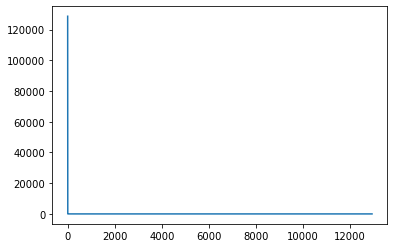

epoch 11 start
heatmap cost
Heat_loss :  3.1431005




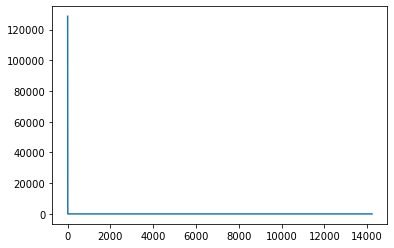

epoch 12 start
heatmap cost
Heat_loss :  3.2453609




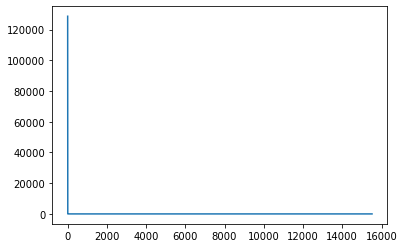

epoch 13 start
heatmap cost
Heat_loss :  3.0532126




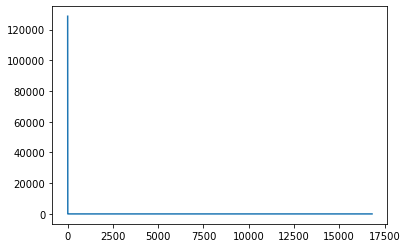

epoch 14 start
heatmap cost
Heat_loss :  3.1260493




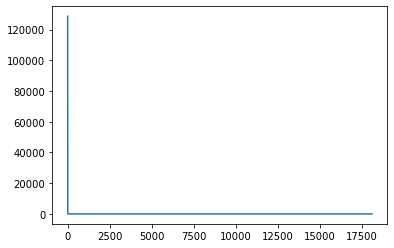

epoch 15 start
heatmap cost
Heat_loss :  3.002695




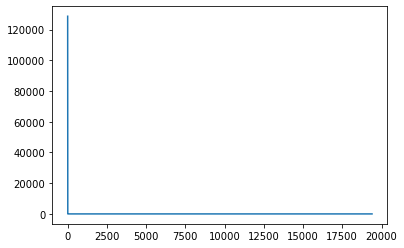

epoch 16 start
heatmap cost
Heat_loss :  3.067271




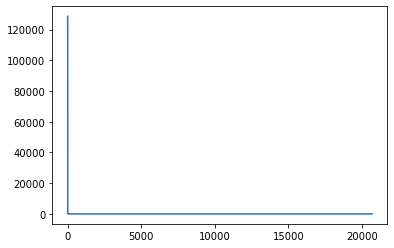

epoch 17 start
heatmap cost
Heat_loss :  2.7305362




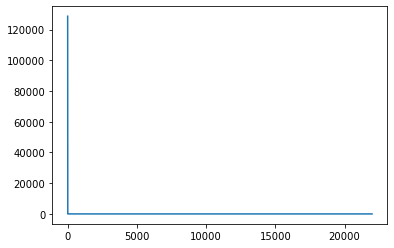

epoch 18 start
heatmap cost
Heat_loss :  2.6264975




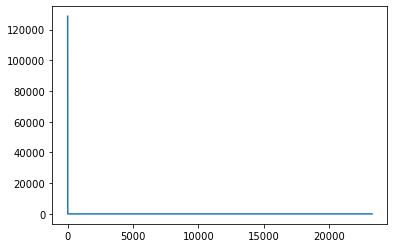

epoch 19 start
heatmap cost
Heat_loss :  2.6078954




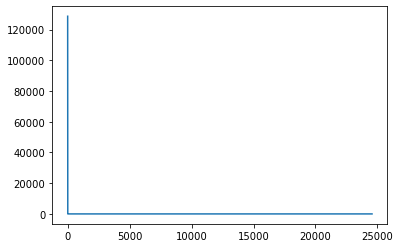

epoch 20 start
heatmap cost
Heat_loss :  2.6254084




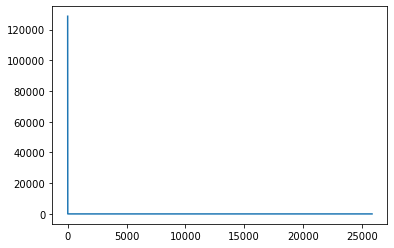

epoch 21 start
heatmap cost
Heat_loss :  2.501469




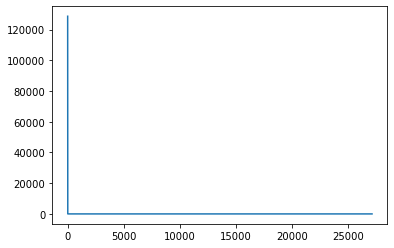

epoch 22 start
heatmap cost
Heat_loss :  2.523447




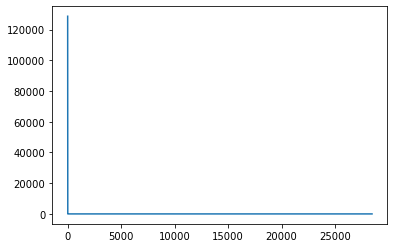

epoch 23 start
heatmap cost
Heat_loss :  2.439568




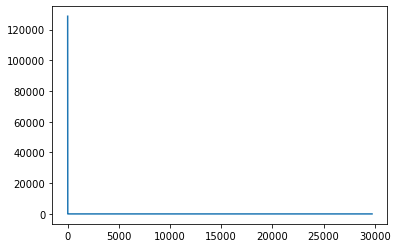

epoch 24 start
heatmap cost
Heat_loss :  3.534152




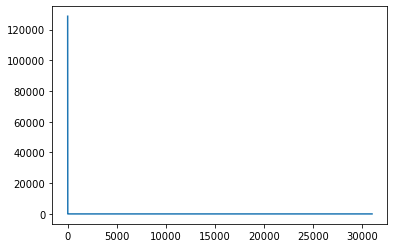

epoch 25 start
heatmap cost
Heat_loss :  2.4185035




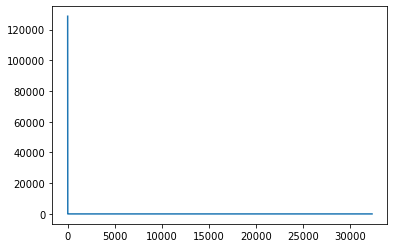

epoch 26 start
heatmap cost
Heat_loss :  2.5825481




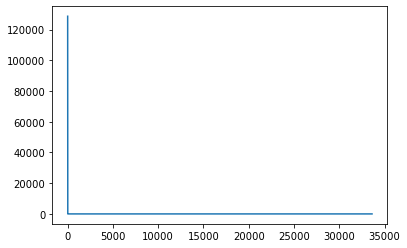

epoch 27 start
heatmap cost
Heat_loss :  2.3108733




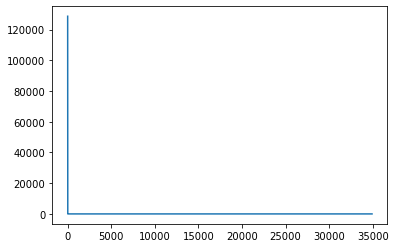

epoch 28 start
heatmap cost
Heat_loss :  2.3795655




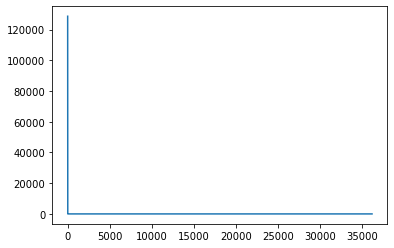

epoch 29 start
heatmap cost
Heat_loss :  2.2259839




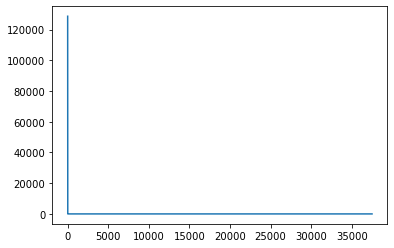

epoch 30 start
heatmap cost
Heat_loss :  2.3386416




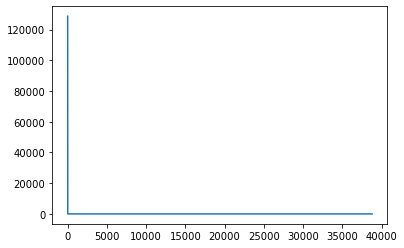

epoch 31 start
heatmap cost
Heat_loss :  2.3569868




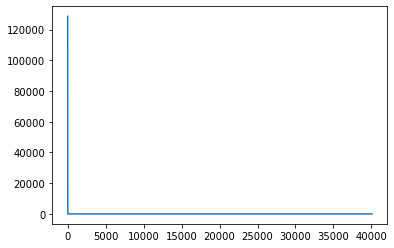

epoch 32 start
heatmap cost
Heat_loss :  2.2719395




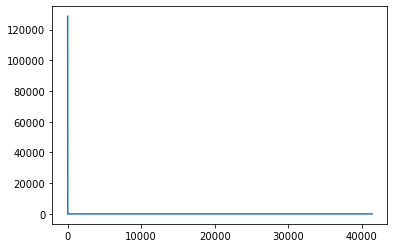

epoch 33 start
heatmap cost
Heat_loss :  2.4072285




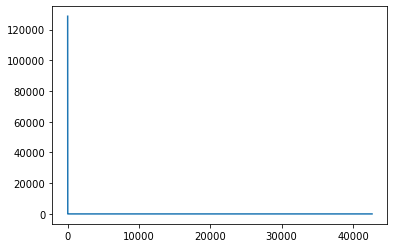

epoch 34 start
heatmap cost
Heat_loss :  2.6717288




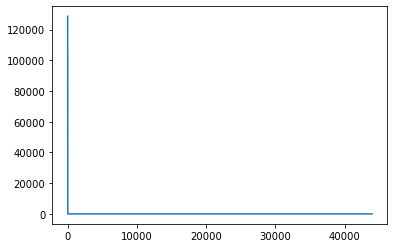

epoch 35 start
heatmap cost
Heat_loss :  2.0539925




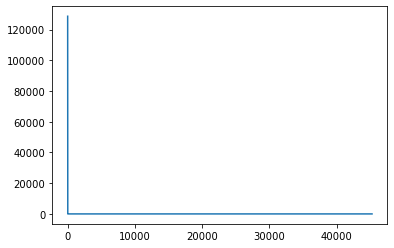

epoch 36 start
heatmap cost
Heat_loss :  2.1742256




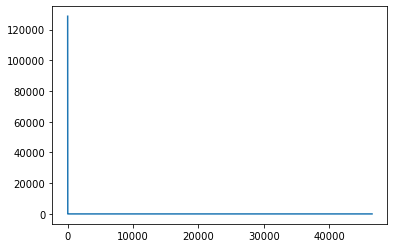

epoch 37 start
heatmap cost
Heat_loss :  2.0776808




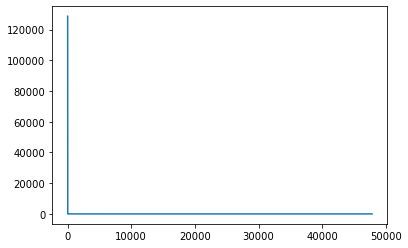

epoch 38 start
heatmap cost
Heat_loss :  2.2738736




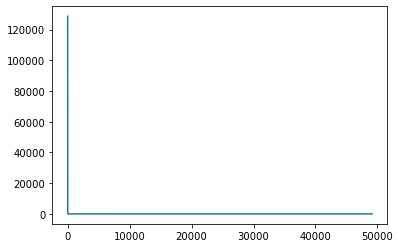

epoch 39 start
heatmap cost
Heat_loss :  2.0523746




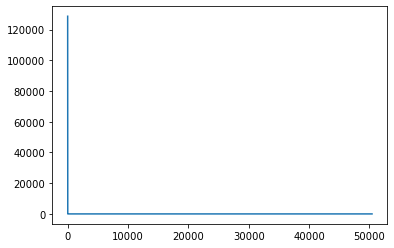

epoch 40 start
heatmap cost
Heat_loss :  2.037774




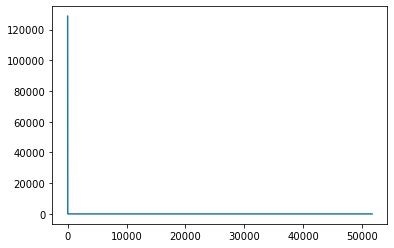

epoch 41 start
heatmap cost
Heat_loss :  2.1110678




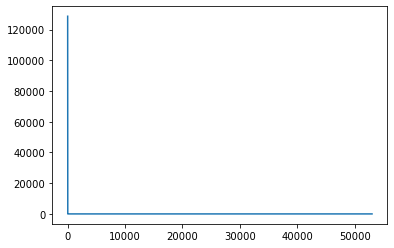

epoch 42 start
heatmap cost
Heat_loss :  1.8668109




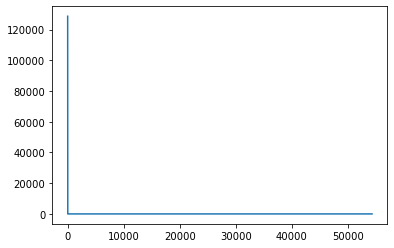

epoch 43 start
heatmap cost
Heat_loss :  1.950737




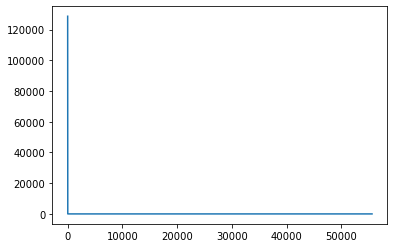

epoch 44 start
heatmap cost
Heat_loss :  2.0482028




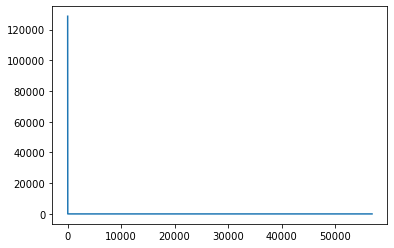

epoch 45 start
heatmap cost
Heat_loss :  2.191644




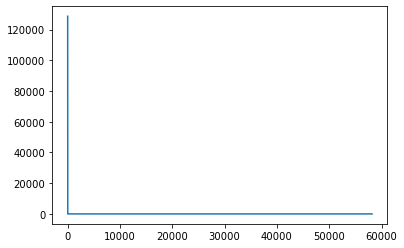

epoch 46 start
heatmap cost
Heat_loss :  3.1528182




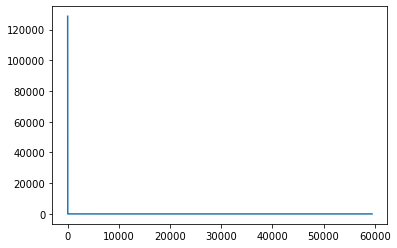

epoch 47 start
heatmap cost
Heat_loss :  1.8724276




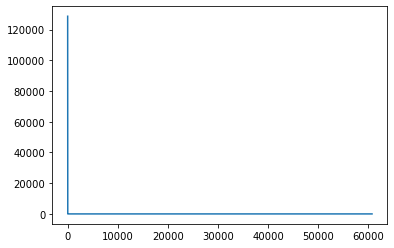

epoch 48 start
heatmap cost
Heat_loss :  1.962064




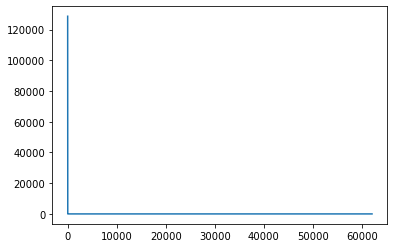

epoch 49 start
heatmap cost
Heat_loss :  1.7775222




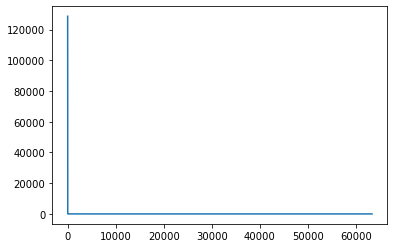

epoch 50 start
heatmap cost
Heat_loss :  1.8042357




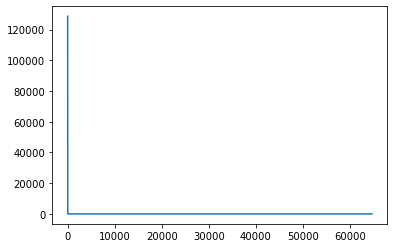

epoch 51 start
heatmap cost
Heat_loss :  1.6694514




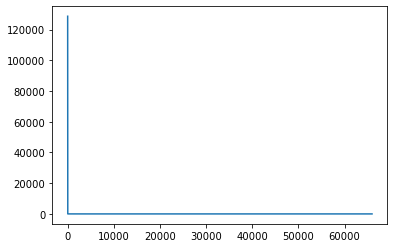

epoch 52 start
heatmap cost
Heat_loss :  2.182077




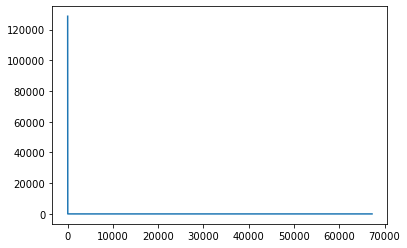

epoch 53 start
heatmap cost
Heat_loss :  1.7426839




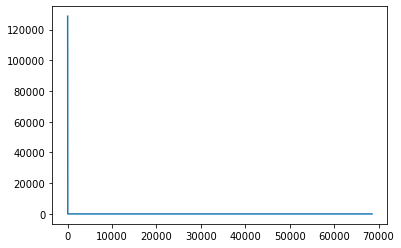

epoch 54 start
heatmap cost
Heat_loss :  1.6958523




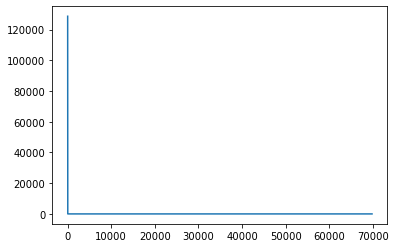

epoch 55 start
heatmap cost
Heat_loss :  1.617208




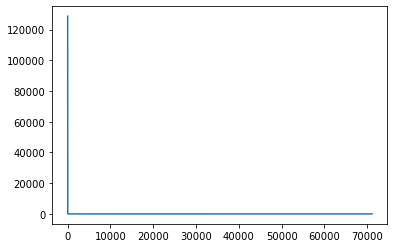

epoch 56 start
heatmap cost
Heat_loss :  1.8101034




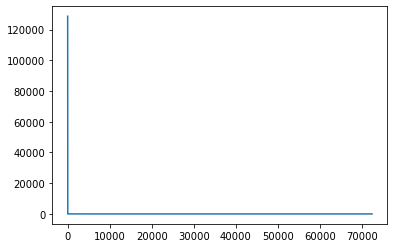

epoch 57 start
heatmap cost
Heat_loss :  1.644742




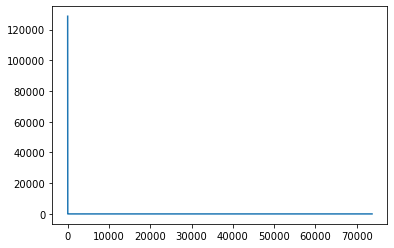

epoch 58 start
heatmap cost
Heat_loss :  1.722285




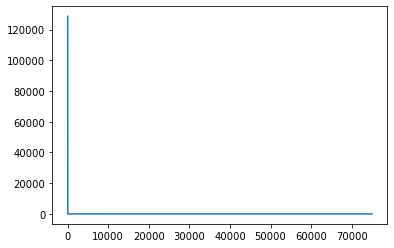

epoch 59 start
heatmap cost
Heat_loss :  1.6495727




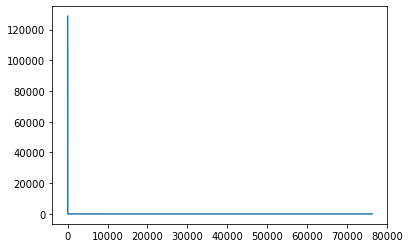

epoch 60 start
heatmap cost
Heat_loss :  1.9496229




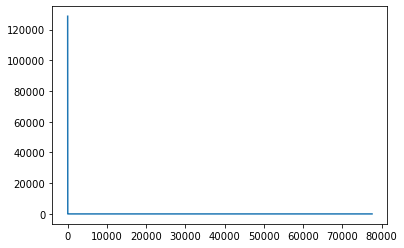

epoch 61 start
heatmap cost
Heat_loss :  1.6585176




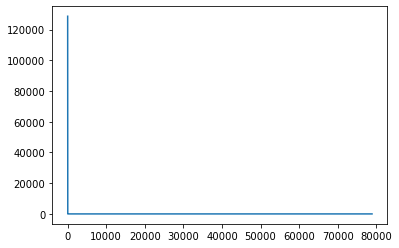

epoch 62 start
heatmap cost
Heat_loss :  1.7205979




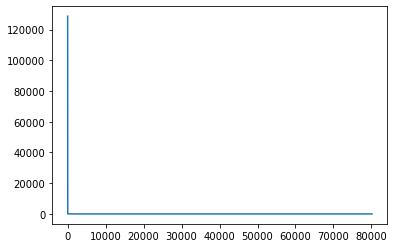

epoch 63 start
heatmap cost
Heat_loss :  1.4078556




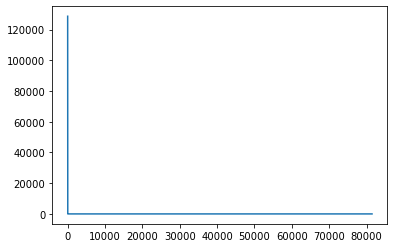

epoch 64 start
heatmap cost
Heat_loss :  1.6339722




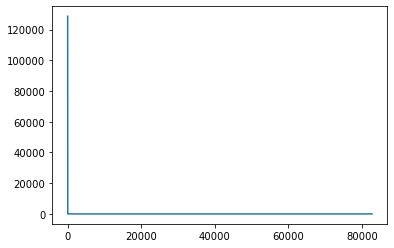

epoch 65 start
heatmap cost
Heat_loss :  2.8416924




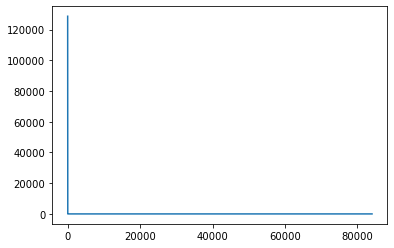

epoch 66 start
heatmap cost
Heat_loss :  1.6443676




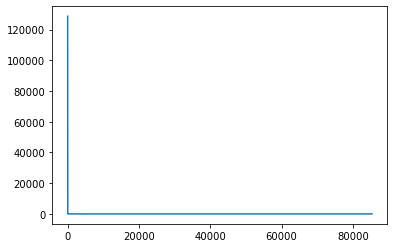

epoch 67 start
heatmap cost
Heat_loss :  1.4953935




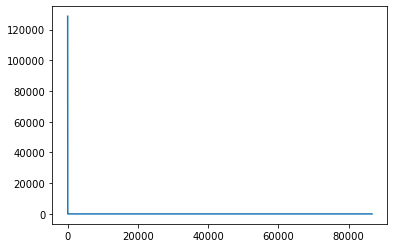

epoch 68 start
heatmap cost
Heat_loss :  1.778844




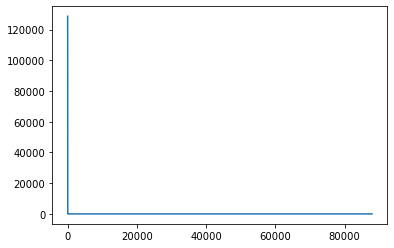

epoch 69 start
heatmap cost
Heat_loss :  1.4385369




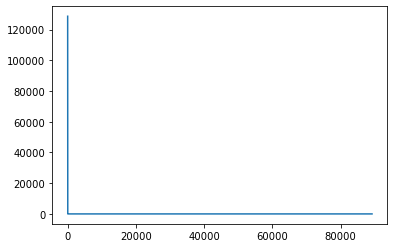

epoch 70 start
heatmap cost
Heat_loss :  1.6062719




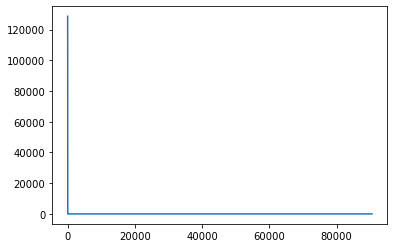

epoch 71 start
heatmap cost
Heat_loss :  1.581146




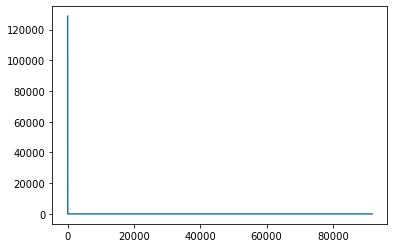

epoch 72 start
heatmap cost
Heat_loss :  1.7898062




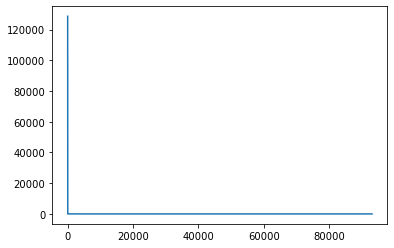

epoch 73 start
heatmap cost
Heat_loss :  1.3815343




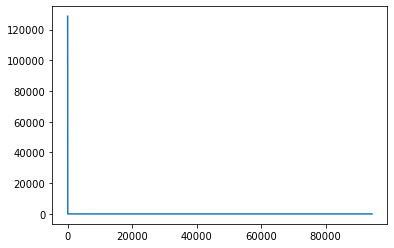

epoch 74 start
heatmap cost
Heat_loss :  1.4593245




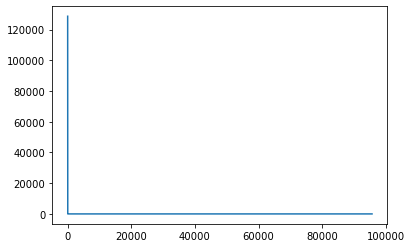

epoch 75 start
heatmap cost
Heat_loss :  1.2669052




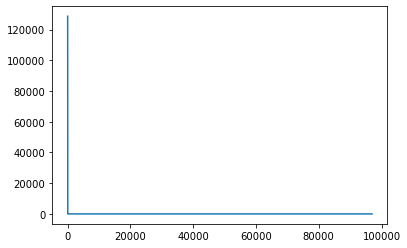

epoch 76 start
heatmap cost
Heat_loss :  1.6298325




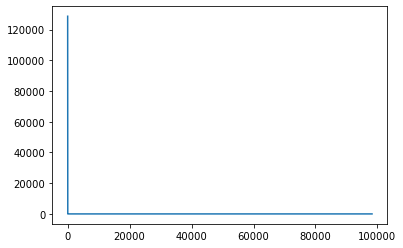

epoch 77 start
heatmap cost
Heat_loss :  1.4021754




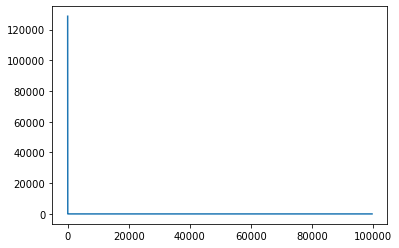

epoch 78 start
heatmap cost
Heat_loss :  1.3494726




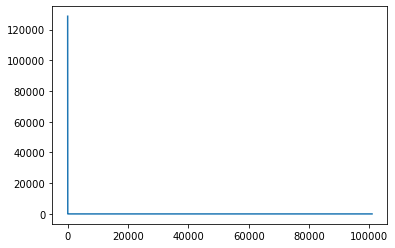

epoch 79 start
heatmap cost
Heat_loss :  1.649793




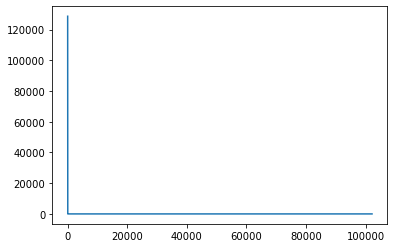

epoch 80 start
heatmap cost
Heat_loss :  1.5410755




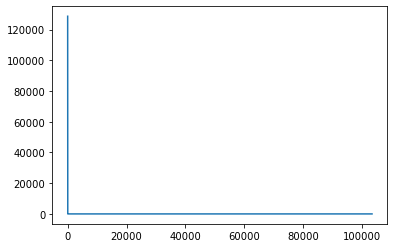

epoch 81 start
heatmap cost
Heat_loss :  1.6391183




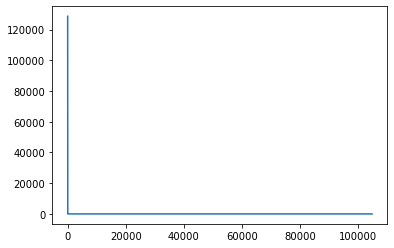

epoch 82 start
heatmap cost
Heat_loss :  1.3509274




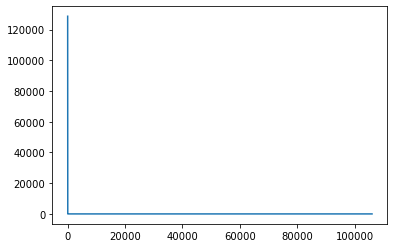

epoch 83 start
heatmap cost
Heat_loss :  1.5764158




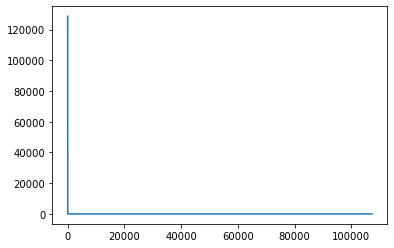

epoch 84 start
heatmap cost
Heat_loss :  1.6507139




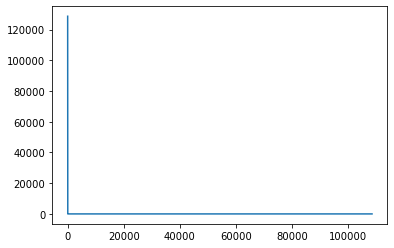

epoch 85 start
heatmap cost
Heat_loss :  1.5240316




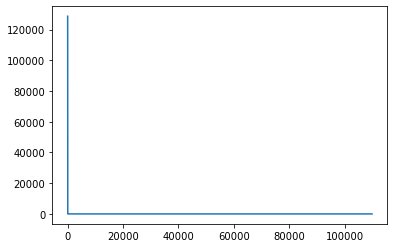

epoch 86 start
heatmap cost
Heat_loss :  1.3080157




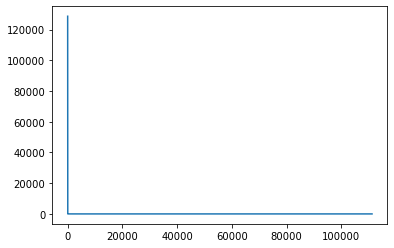

epoch 87 start
heatmap cost
Heat_loss :  1.872574




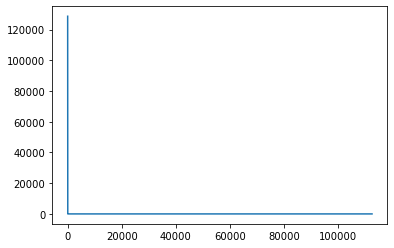

epoch 88 start
heatmap cost
Heat_loss :  3.2790508




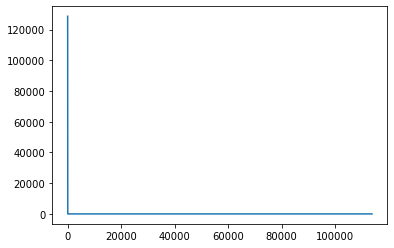

epoch 89 start
heatmap cost
Heat_loss :  1.3621347




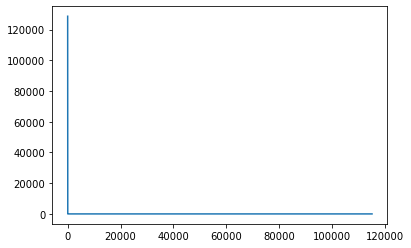

epoch 90 start
heatmap cost
Heat_loss :  1.4073354




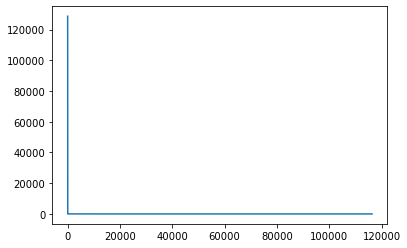

epoch 91 start
heatmap cost
Heat_loss :  1.1740602




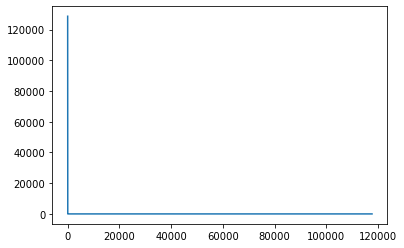

epoch 92 start
heatmap cost
Heat_loss :  2.1260788




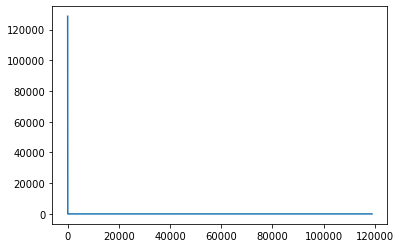

epoch 93 start
heatmap cost
Heat_loss :  1.4299097




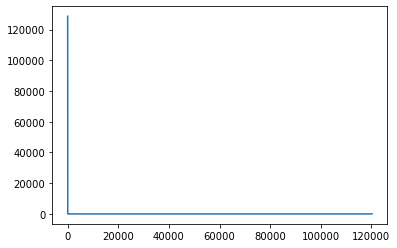

epoch 94 start
heatmap cost
Heat_loss :  1.9199651




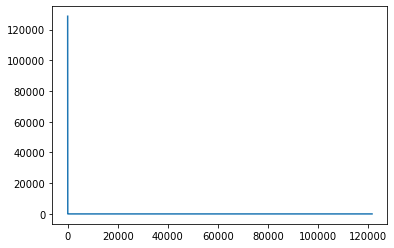

epoch 95 start
heatmap cost
Heat_loss :  1.3986897




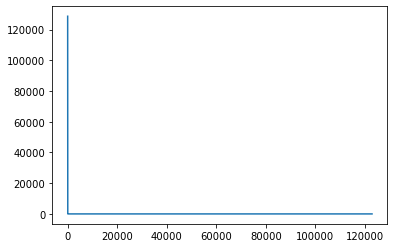

epoch 96 start
heatmap cost
Heat_loss :  1.6941657




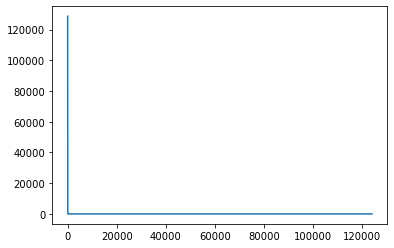

epoch 97 start
heatmap cost
Heat_loss :  1.4665451




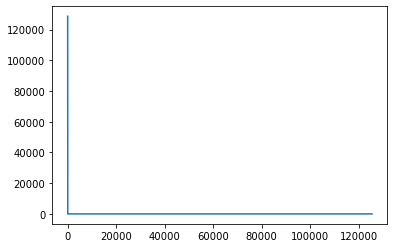

epoch 98 start
heatmap cost
Heat_loss :  1.3188376




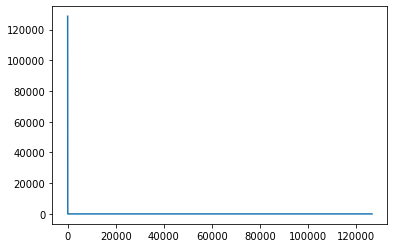

epoch 99 start
heatmap cost
Heat_loss :  1.4295453




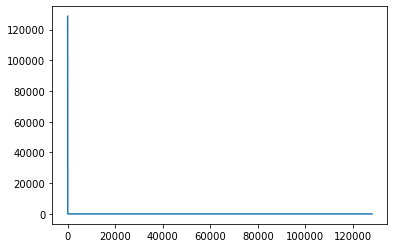

epoch 100 start
heatmap cost
Heat_loss :  1.1240126




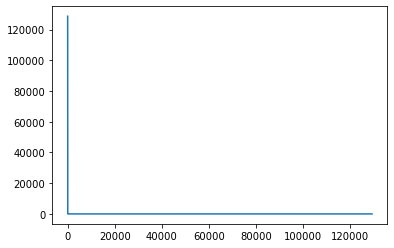

epoch 101 start
heatmap cost
Heat_loss :  1.264883




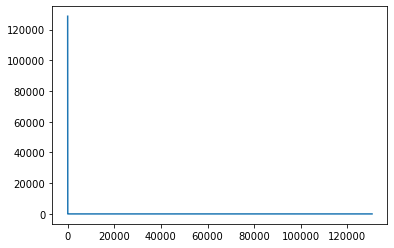

epoch 102 start
heatmap cost
Heat_loss :  0.9210318




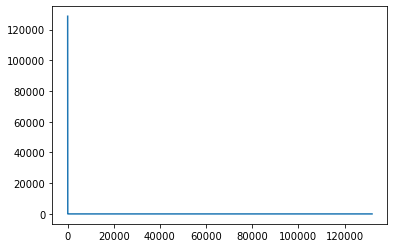

epoch 103 start
heatmap cost
Heat_loss :  1.1513257




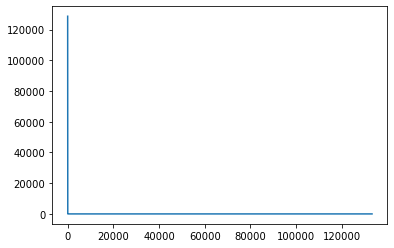

epoch 104 start
heatmap cost
Heat_loss :  2.9716213




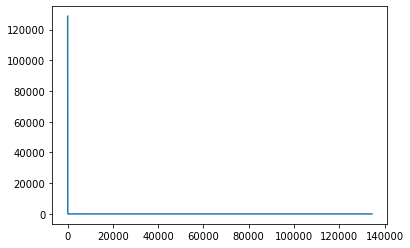

epoch 105 start
heatmap cost
Heat_loss :  1.2397848




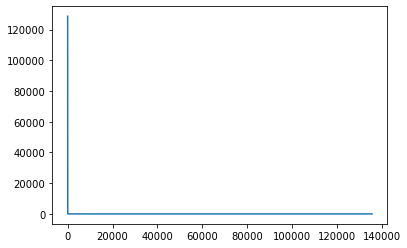

epoch 106 start
heatmap cost
Heat_loss :  1.2280821




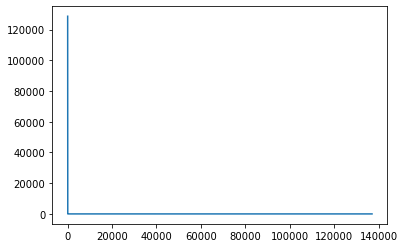

epoch 107 start
heatmap cost
Heat_loss :  1.1091851




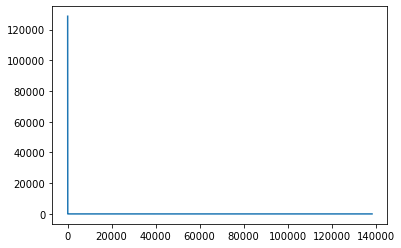

epoch 108 start
heatmap cost
Heat_loss :  3.0009058




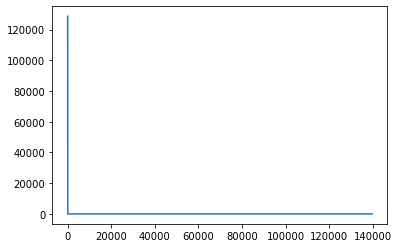

epoch 109 start
heatmap cost
Heat_loss :  1.5278915




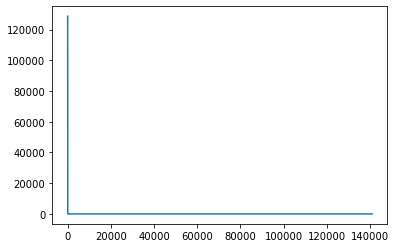

epoch 110 start
heatmap cost
Heat_loss :  1.6109279




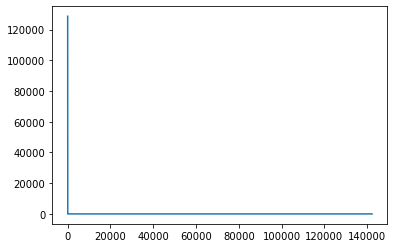

epoch 111 start
heatmap cost
Heat_loss :  1.2193868




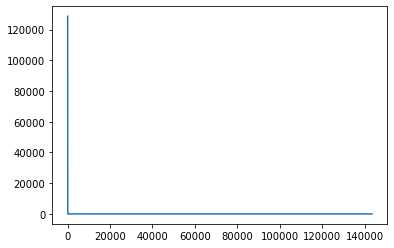

epoch 112 start
heatmap cost
Heat_loss :  1.3572181




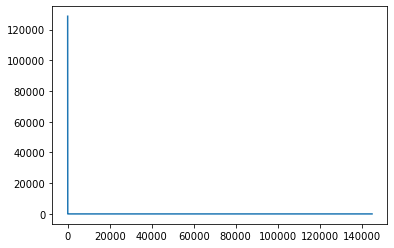

epoch 113 start
heatmap cost
Heat_loss :  1.0960597




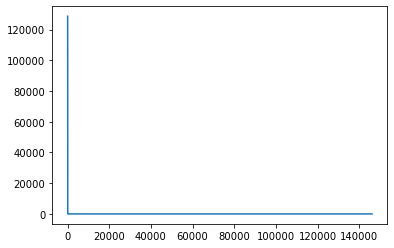

epoch 114 start
heatmap cost
Heat_loss :  1.1863806




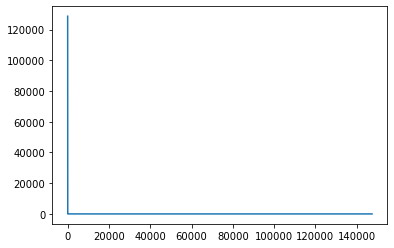

epoch 115 start
heatmap cost
Heat_loss :  1.0217493




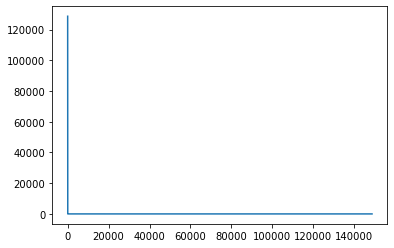

epoch 116 start
heatmap cost
Heat_loss :  1.0516983




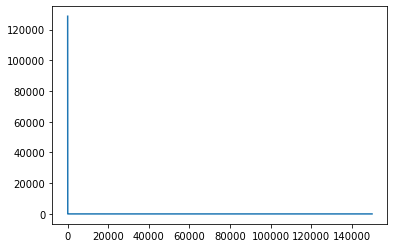

epoch 117 start
heatmap cost
Heat_loss :  1.0915935




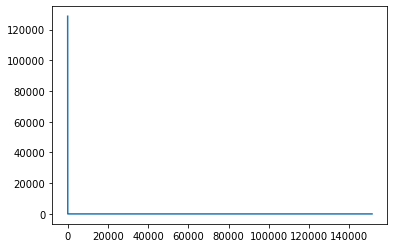

epoch 118 start
heatmap cost
Heat_loss :  1.9690212




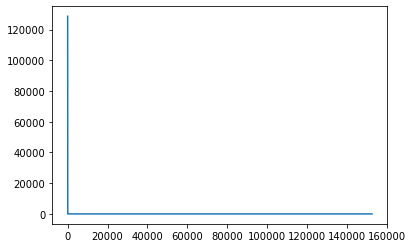

epoch 119 start
heatmap cost
Heat_loss :  1.3251901




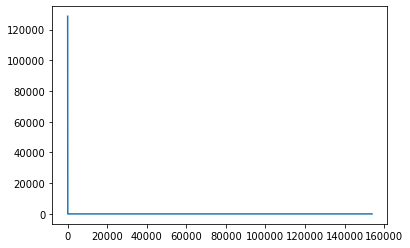

epoch 120 start
heatmap cost
Heat_loss :  0.9511654




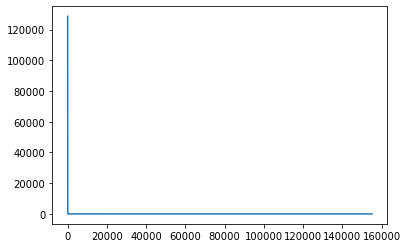

epoch 121 start
heatmap cost
Heat_loss :  0.8536307




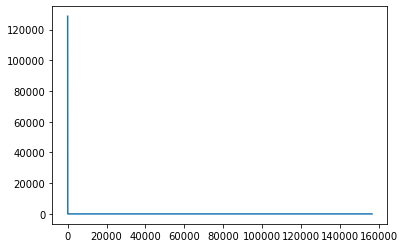

epoch 122 start
heatmap cost
Heat_loss :  1.1817832




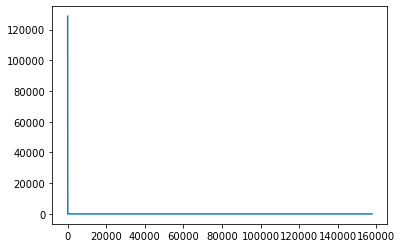

epoch 123 start
heatmap cost
Heat_loss :  1.1229438




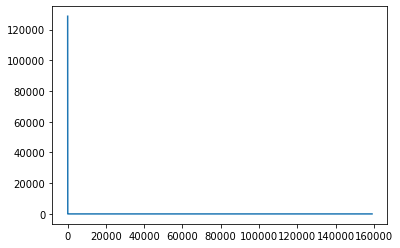

epoch 124 start
heatmap cost
Heat_loss :  0.9739659




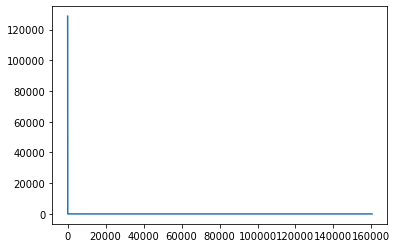

epoch 125 start
heatmap cost
Heat_loss :  3.0043423




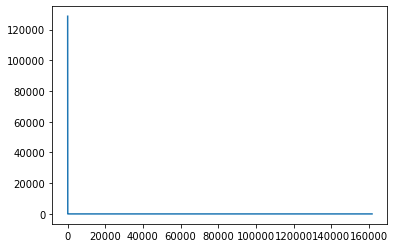

epoch 126 start
heatmap cost
Heat_loss :  1.1977624




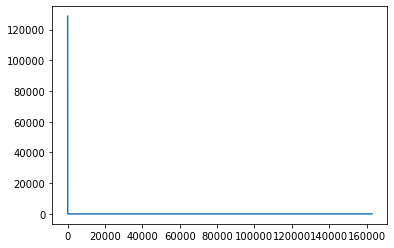

epoch 127 start
heatmap cost
Heat_loss :  1.2990111




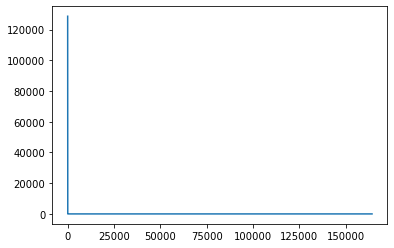

epoch 128 start
heatmap cost
Heat_loss :  0.96078044




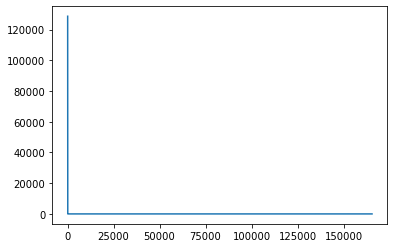

epoch 129 start
heatmap cost
Heat_loss :  1.6443436




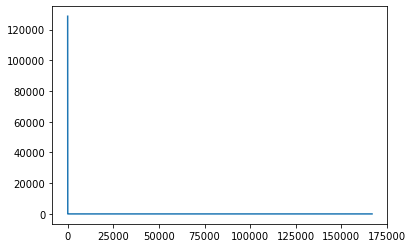

epoch 130 start
heatmap cost
Heat_loss :  0.97806364




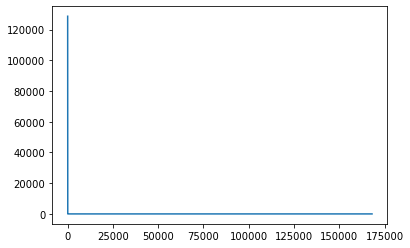

epoch 131 start
heatmap cost
Heat_loss :  0.8473938




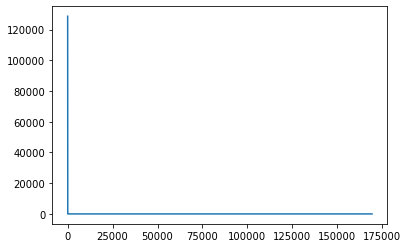

epoch 132 start
heatmap cost
Heat_loss :  1.1274868




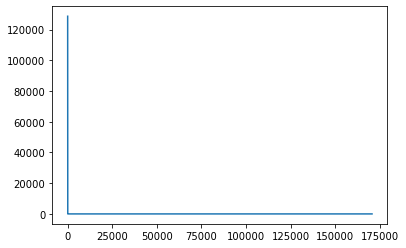

epoch 133 start
heatmap cost
Heat_loss :  0.94305944




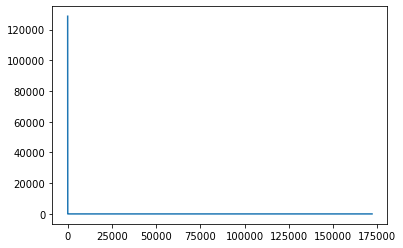

epoch 134 start
heatmap cost
Heat_loss :  0.86766946




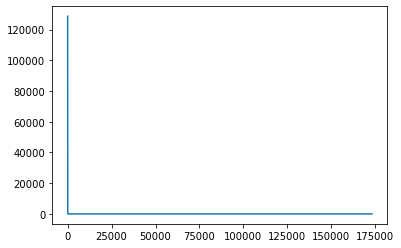

epoch 135 start
heatmap cost
Heat_loss :  1.2099435




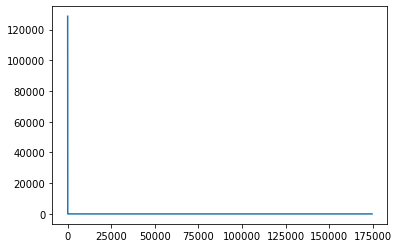

epoch 136 start
heatmap cost
Heat_loss :  0.70438045




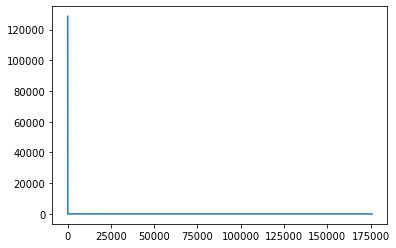

epoch 137 start
heatmap cost
Heat_loss :  1.2952325




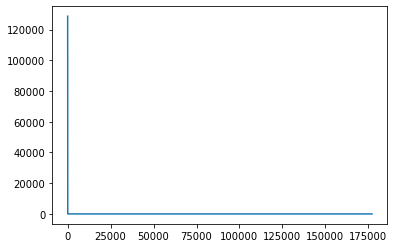

epoch 138 start
heatmap cost
Heat_loss :  1.5249637




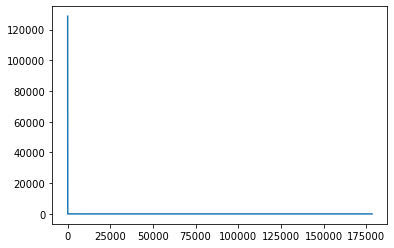

epoch 139 start
heatmap cost
Heat_loss :  1.1601661




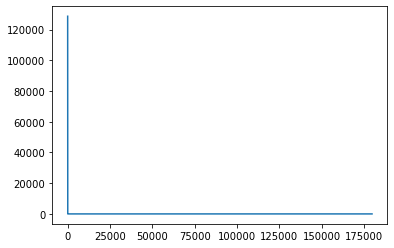

epoch 140 start
heatmap cost
Heat_loss :  0.8211316




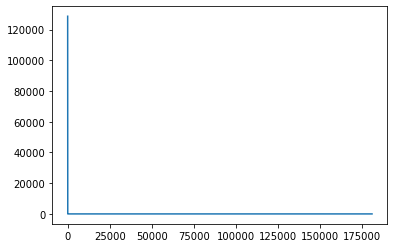

epoch 141 start
heatmap cost
Heat_loss :  0.75646734




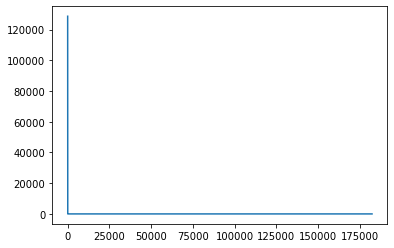

epoch 142 start
heatmap cost
Heat_loss :  0.858992




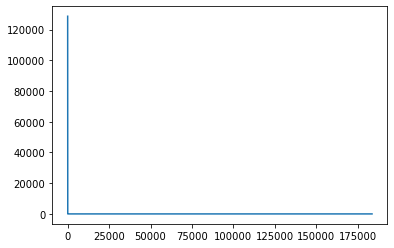

epoch 143 start
heatmap cost
Heat_loss :  0.6570895




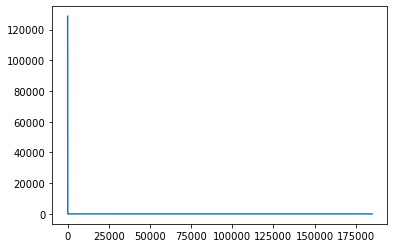

epoch 144 start
heatmap cost
Heat_loss :  1.0382034




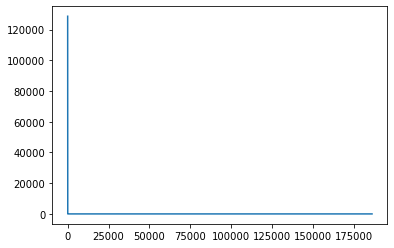

epoch 145 start
heatmap cost
Heat_loss :  0.83900416




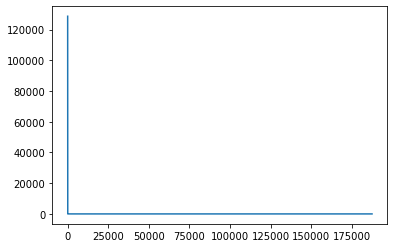

epoch 146 start
heatmap cost
Heat_loss :  0.7270043




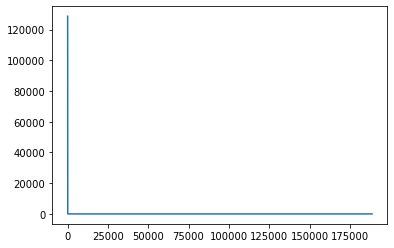

epoch 147 start
heatmap cost
Heat_loss :  0.6871074




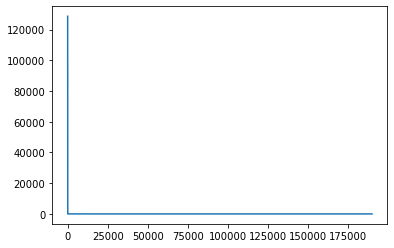

epoch 148 start
heatmap cost
Heat_loss :  1.5441484




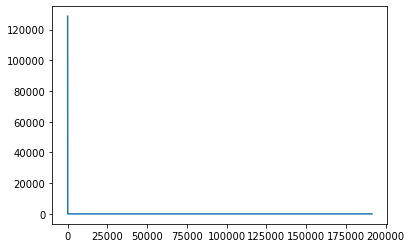

epoch 149 start
heatmap cost
Heat_loss :  0.7409374




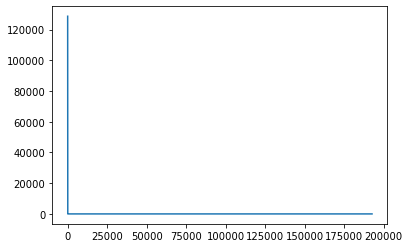

epoch 150 start
heatmap cost
Heat_loss :  0.620119




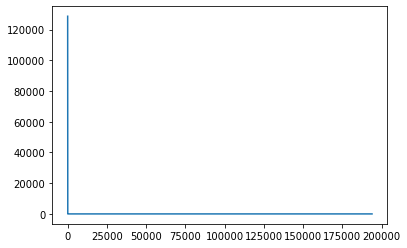

In [4]:
with tf.Session() as sess:
    obj = CenterNet(sess=sess, batch_size=64, epochs = 150, lr=1e-4)
    obj.train()
    #batch_Img_resized, predicted_heatmap, label_heatmap = obj.test()
    #batch_Img_resized, batch_Anno_Data, batch_Heatmap, gaussian_Heatmap, categories = obj.data_test()

In [4]:
with tf.Session() as sess:
    obj = CenterNet(sess=sess, batch_size=64, epochs = 50, lr=1e-4)
    #obj.train()
    batch_Img_resized, predicted_heatmap, label_heatmap, label_Anno_Data, categories = obj.test()
    #batch_Img_resized, batch_Anno_Data, batch_Heatmap, gaussian_Heatmap, categories = obj.data_test()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
------------------------------------session start------------------------------------

** test data load start **
** training data load finish **
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:/Users/jaekyu/Documents/Jupyter Lab/CenterNet/Weight/Weight.ckpt
** Weight.ckpt file exist. file loaded **
** Test Start **


In [11]:
idx = 1

Img Shape :  (64, 256, 256, 3)


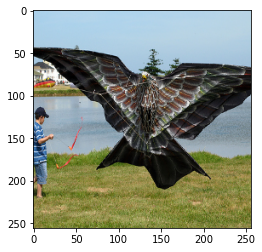

In [12]:
print("Img Shape : ", np.shape(batch_Img_resized))
plt.imshow(batch_Img_resized[idx])

In [13]:
print(label_Anno_Data[idx])
#print()
#print(categories)

[[1, [0.0, 167.06, 48.03, 156.75]], [38, [0.0, 64.89, 500.0, 244.38]], [38, [0.0, 115.64, 53.13, 19.52]], [3, [71.65, 122.96, 14.24, 6.96]]]


Heatmap Shape :  (64, 91, 64, 64)
0


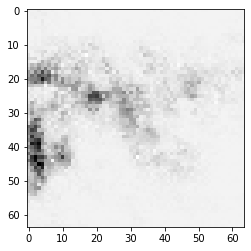

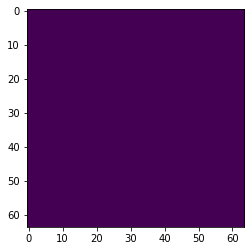

1


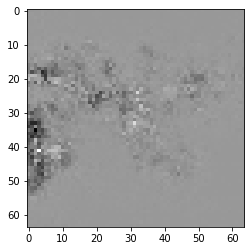

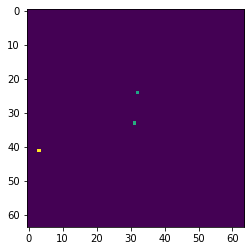

2


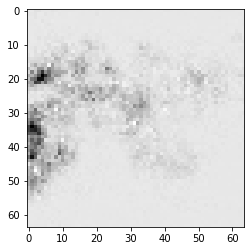

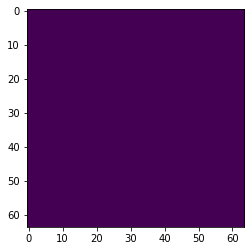

3


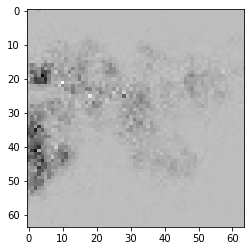

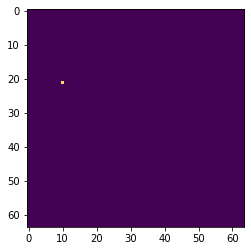

4


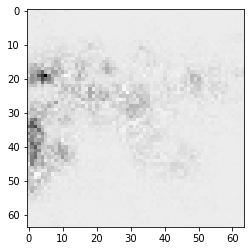

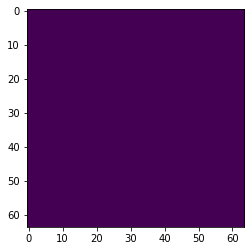

5


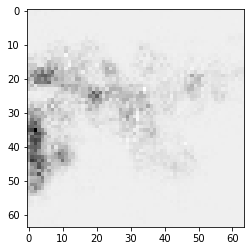

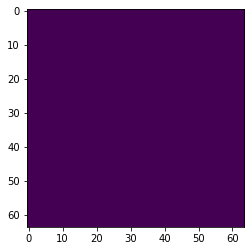

6


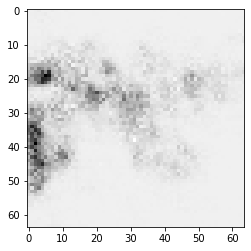

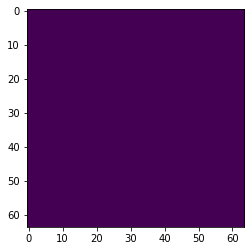

7


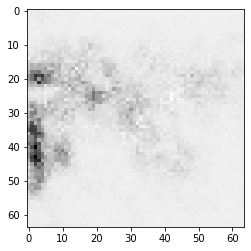

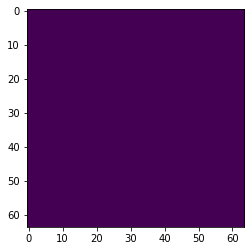

8


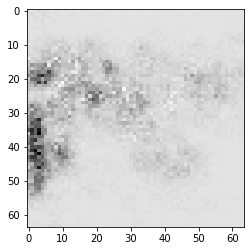

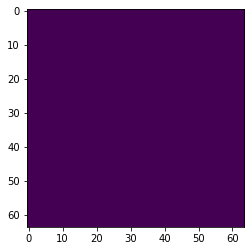

9


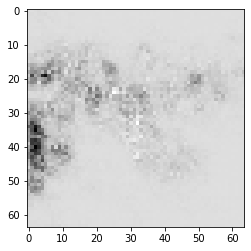

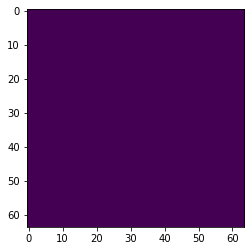

10


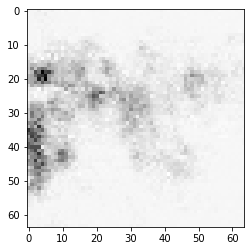

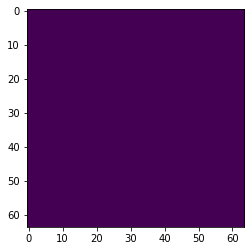

11


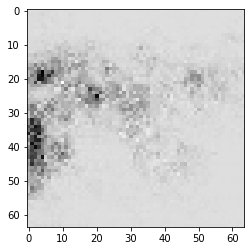

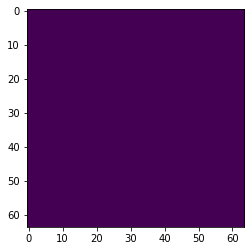

12


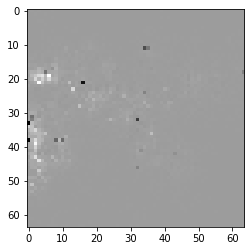

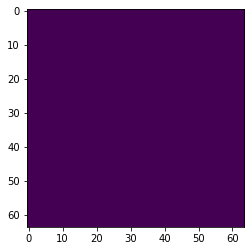

13


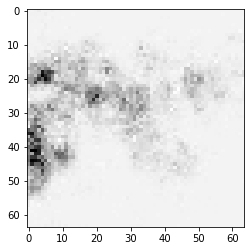

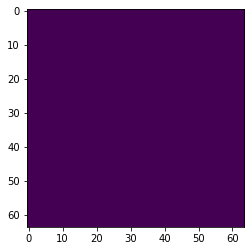

14


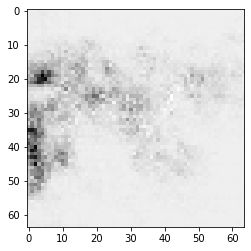

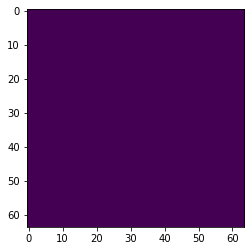

15


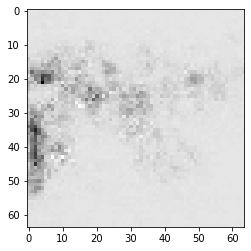

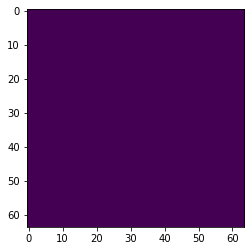

16


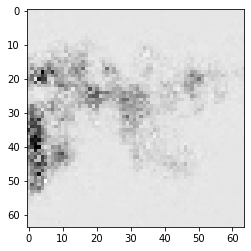

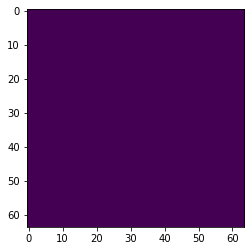

17


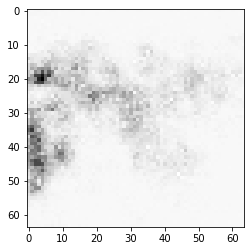

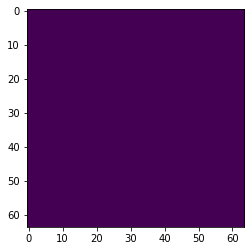

18


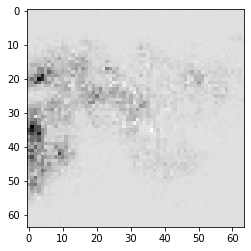

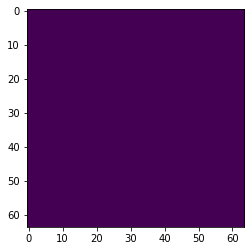

19


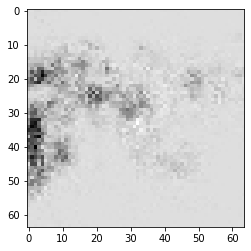

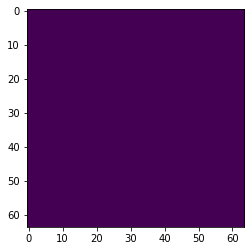

20


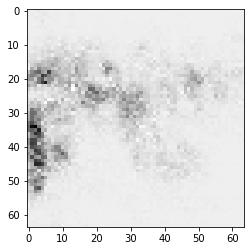

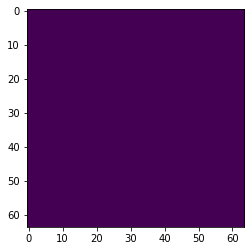

21


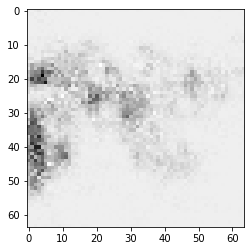

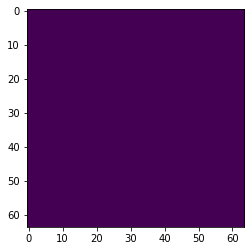

22


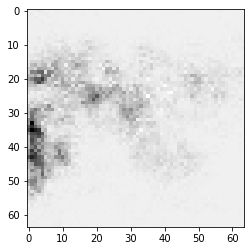

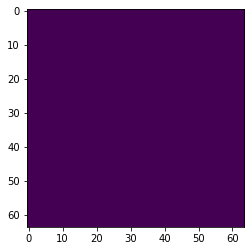

23


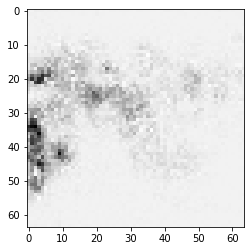

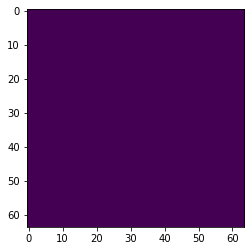

24


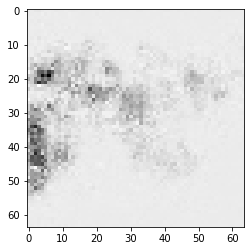

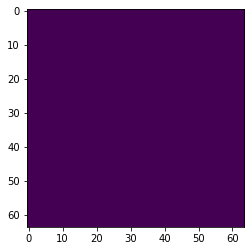

25


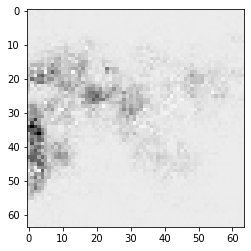

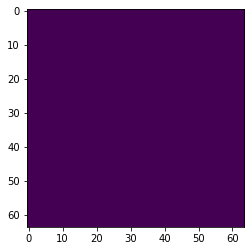

26


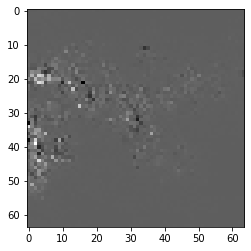

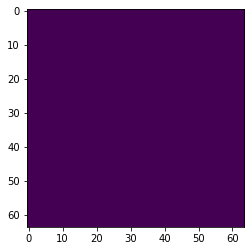

27


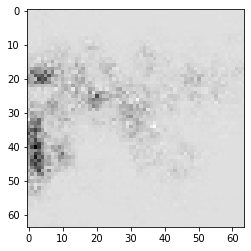

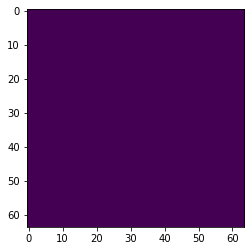

28


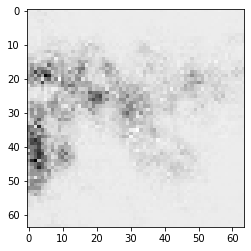

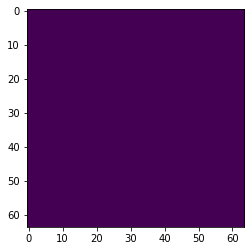

29


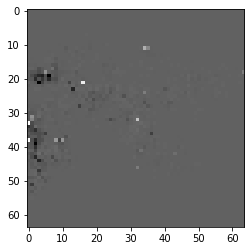

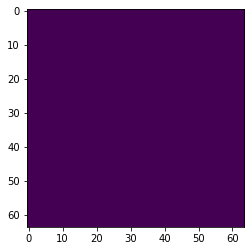

30


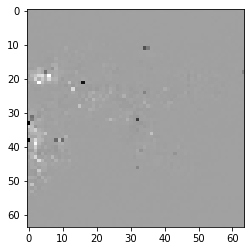

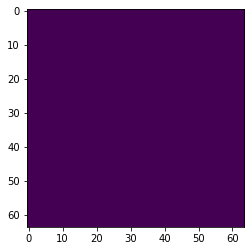

31


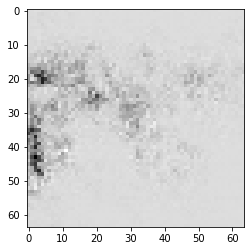

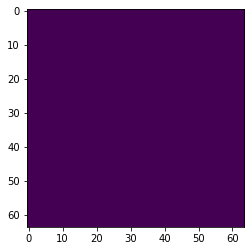

32


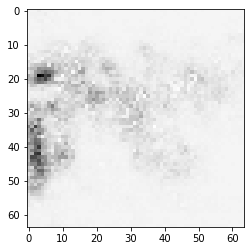

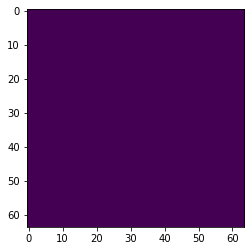

33


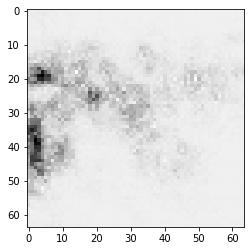

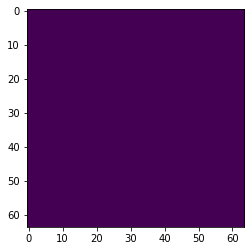

34


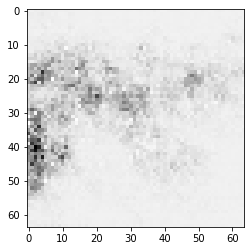

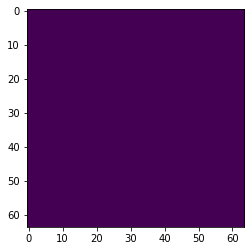

35


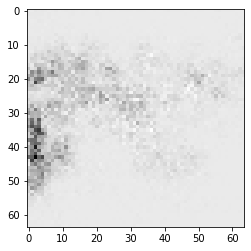

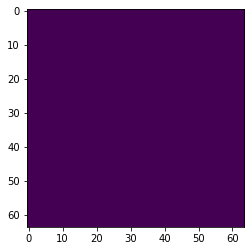

36


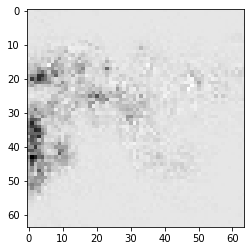

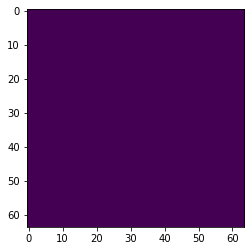

37


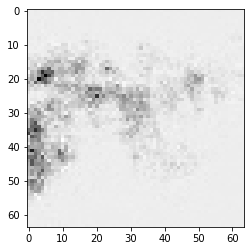

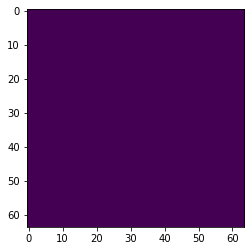

38


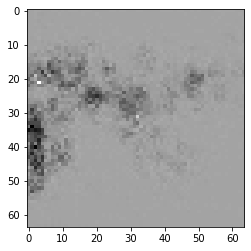

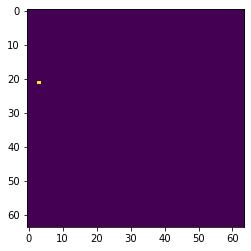

39


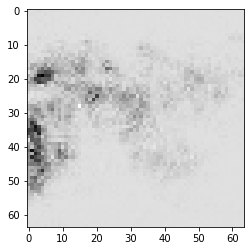

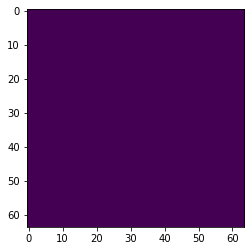

40


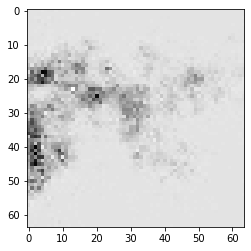

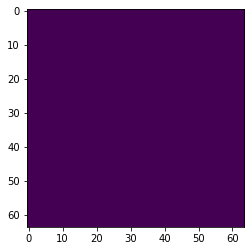

41


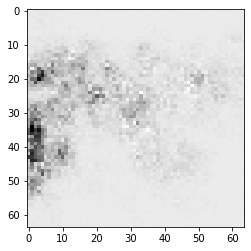

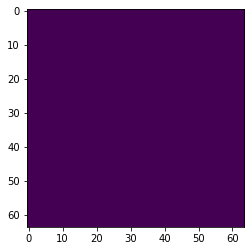

42


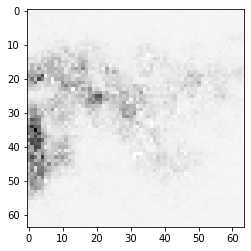

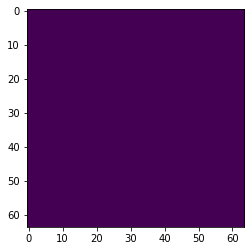

43


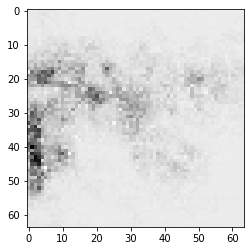

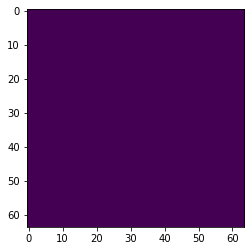

44


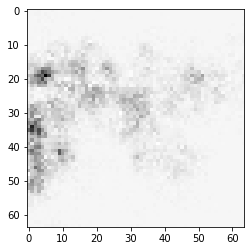

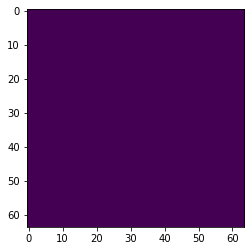

45


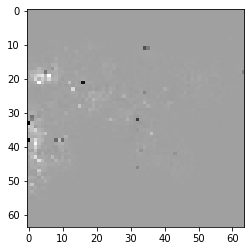

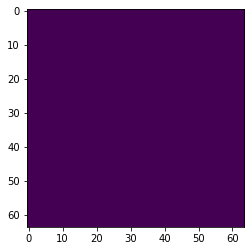

46


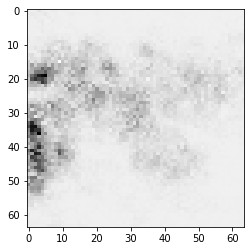

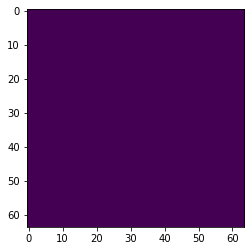

47


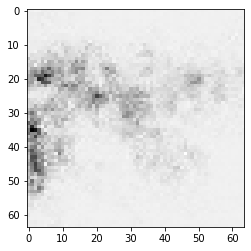

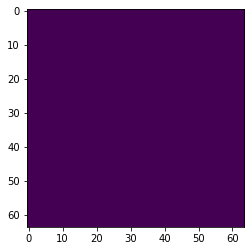

48


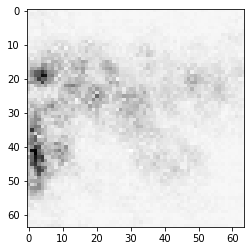

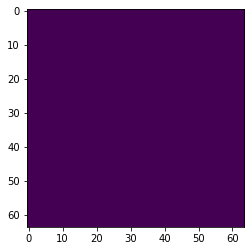

49


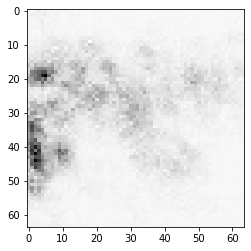

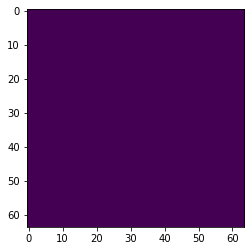

50


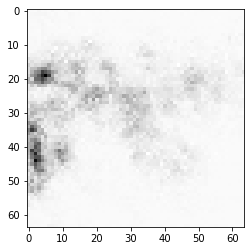

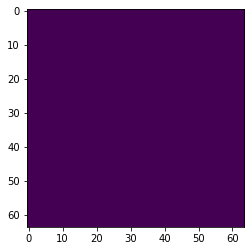

51


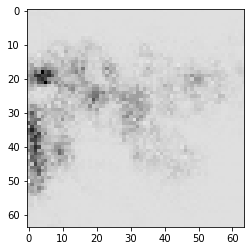

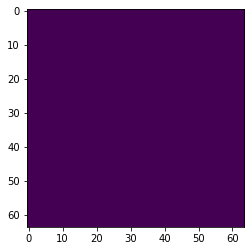

52


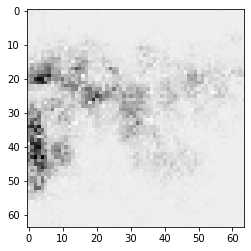

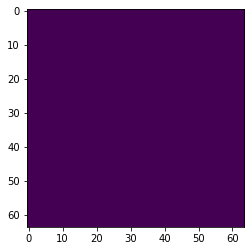

53


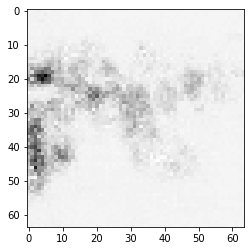

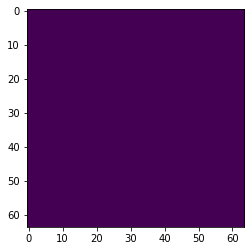

54


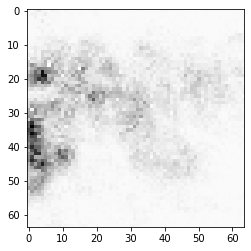

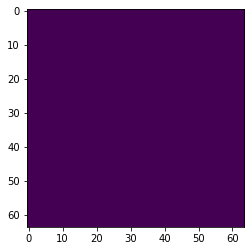

55


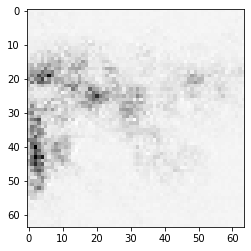

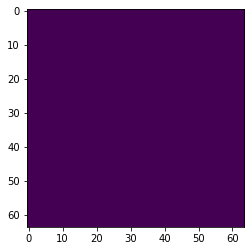

56


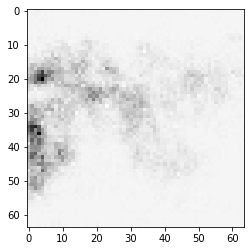

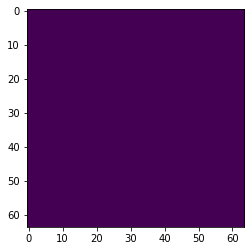

57


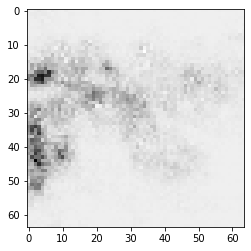

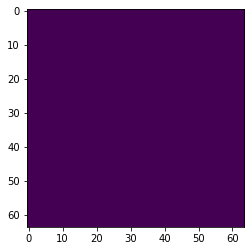

58


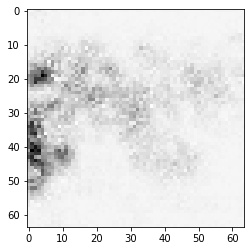

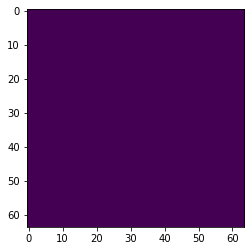

59


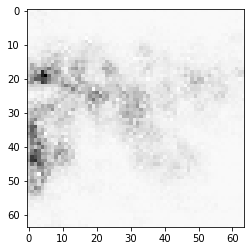

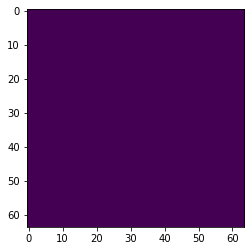

60


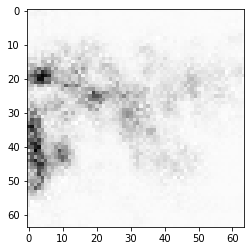

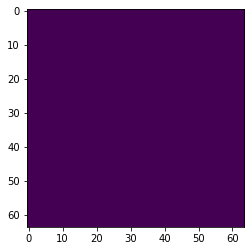

61


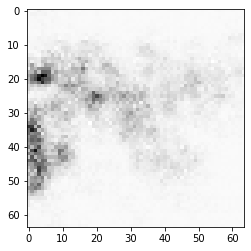

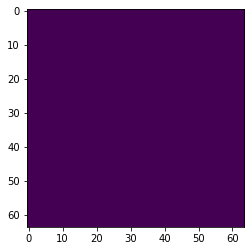

62


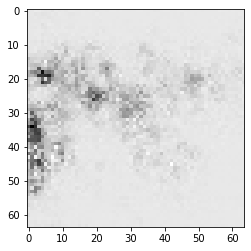

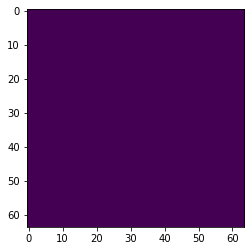

63


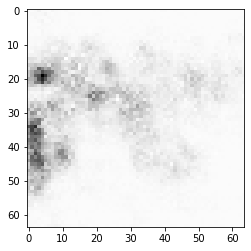

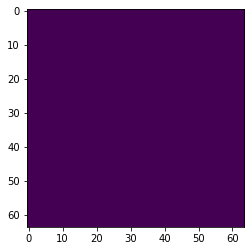

64


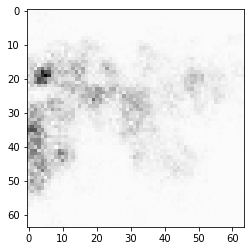

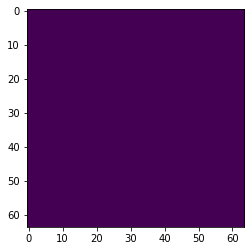

65


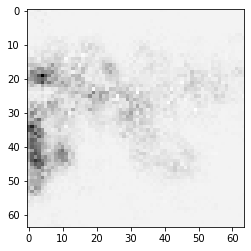

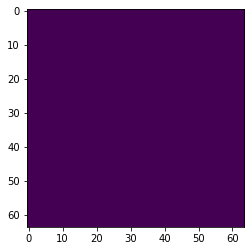

66


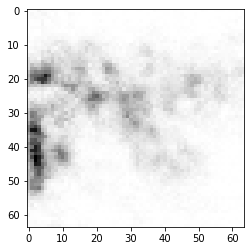

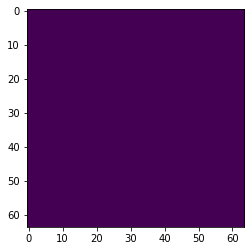

67


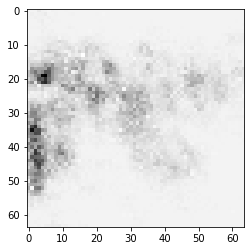

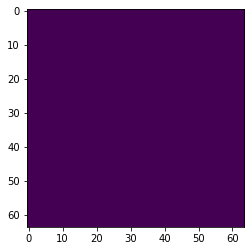

68


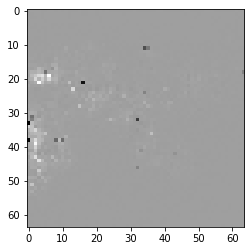

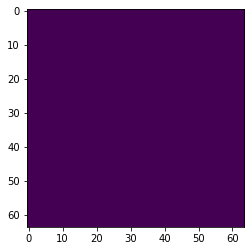

69


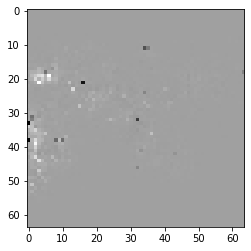

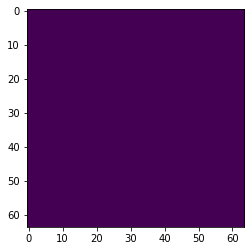

70


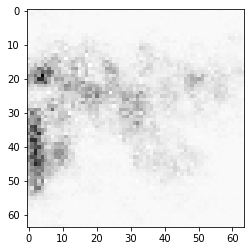

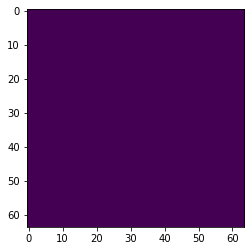

71


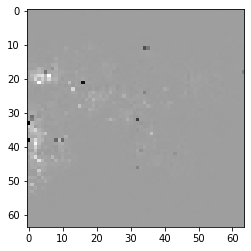

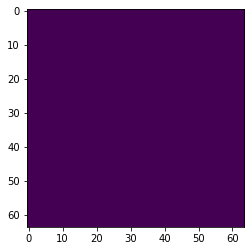

72


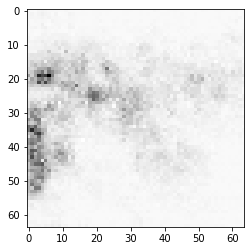

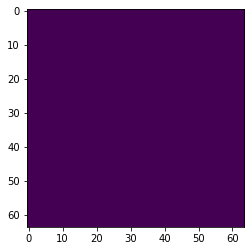

73


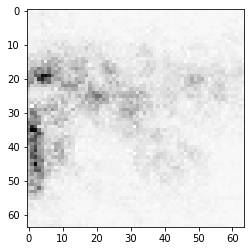

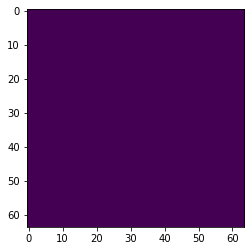

74


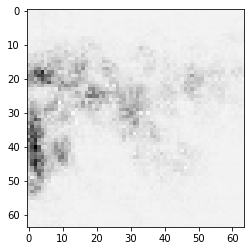

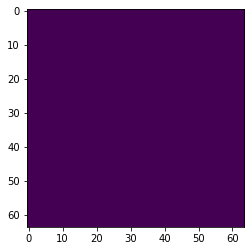

75


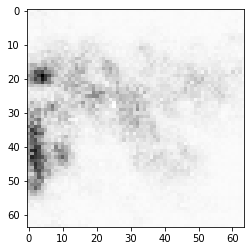

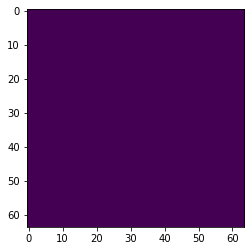

76


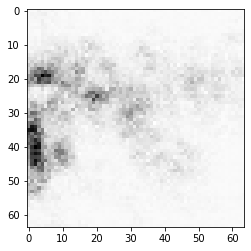

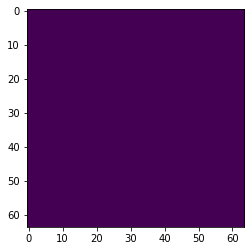

77


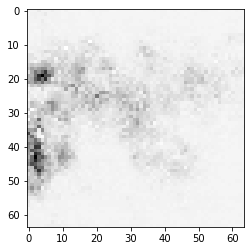

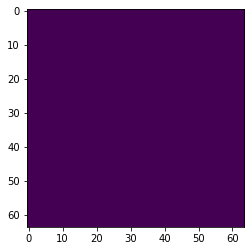

78


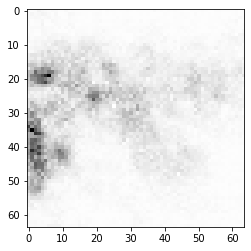

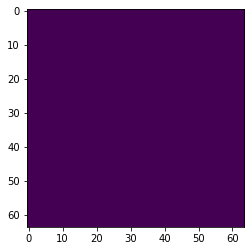

79


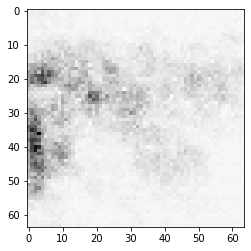

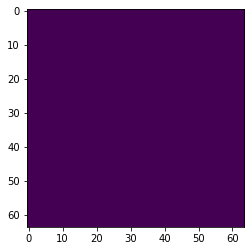

80


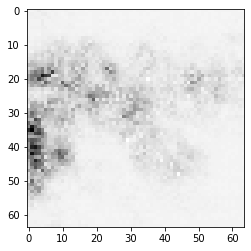

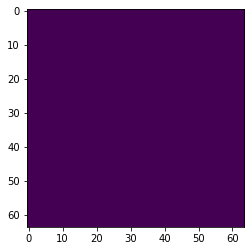

81


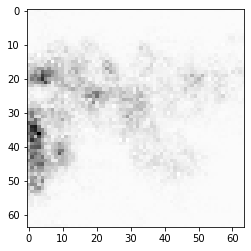

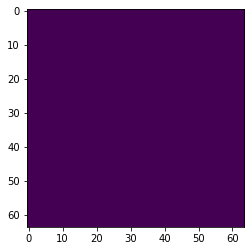

82


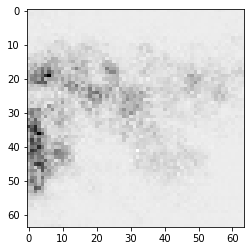

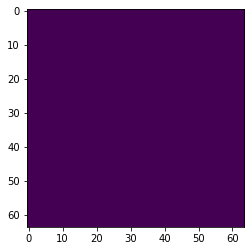

83


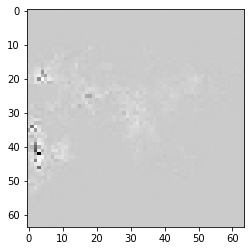

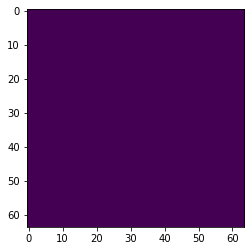

84


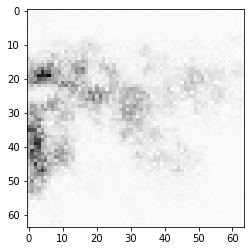

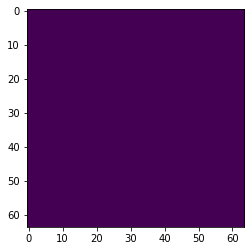

85


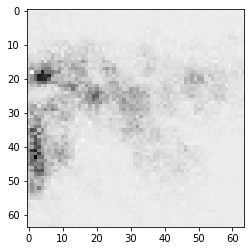

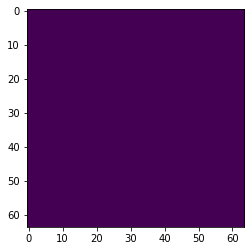

86


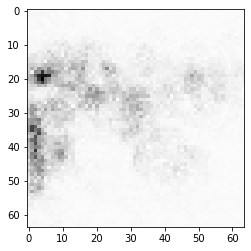

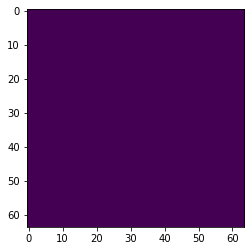

87


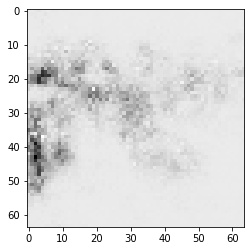

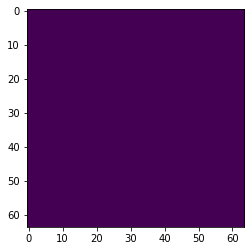

88


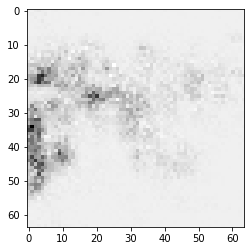

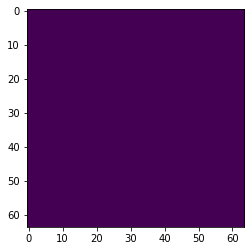

89


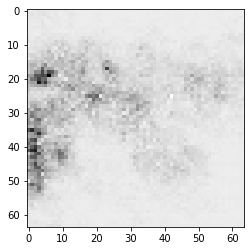

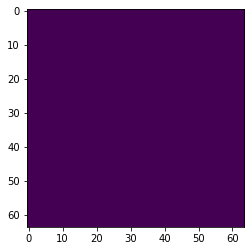

90


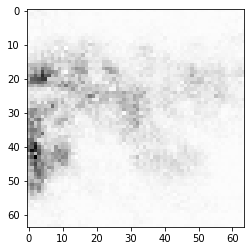

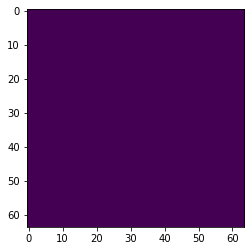

In [15]:
print("Heatmap Shape : ", np.shape(predicted_heatmap))
for i in range(91):
    print(i)
    output = np.zeros((64, 64), np.float32)
    for r in range(64):
        for c in range(64):
            if(predicted_heatmap[idx][i][r][c] > 0.3):
                output[r][c] = predicted_heatmap[idx][i][r][c]
    plt.imshow(predicted_heatmap[idx][i], cmap='gray')
    plt.show()
    plt.imshow(output)
    plt.show()
#plt.imshow(sum_of_heatmap[idx])

Label Heatmap Shape :  (64, 91, 64, 64)
channel summed shape :  (64, 64, 64)


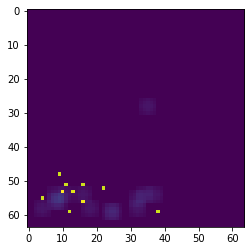

In [22]:
print("Label Heatmap Shape : ", np.shape(label_heatmap))
sum_of_label_heatmap = uF.sum_of_channel(label_heatmap)
print("channel summed shape : ", np.shape(sum_of_label_heatmap))
plt.imshow(sum_of_label_heatmap[idx])

In [23]:
sum_of_label_heatmap[idx].max()

276.1745662689209

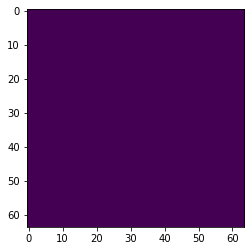

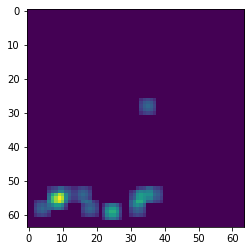

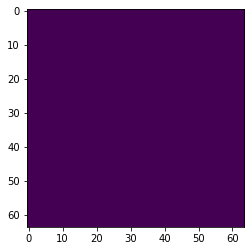

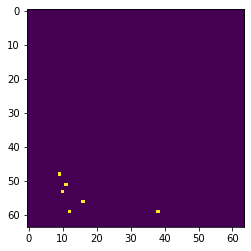

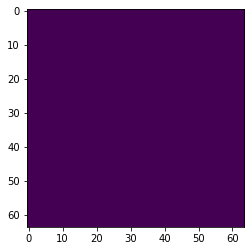

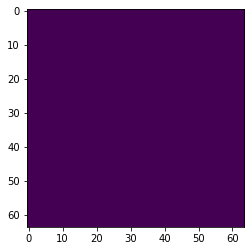

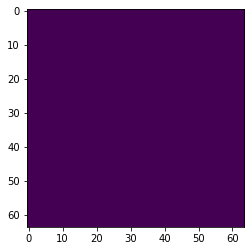

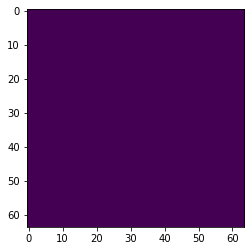

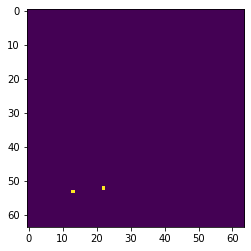

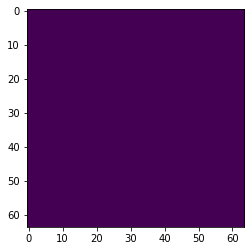

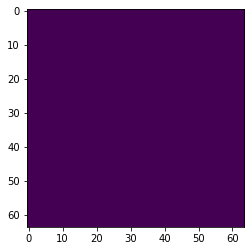

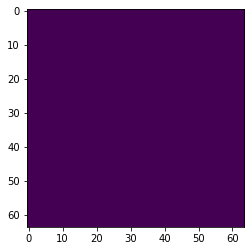

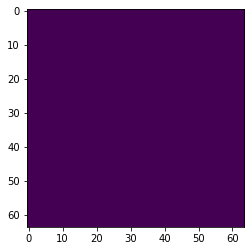

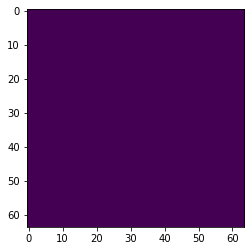

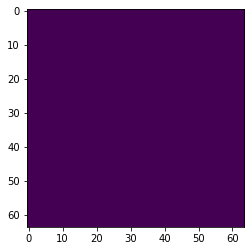

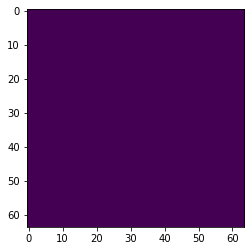

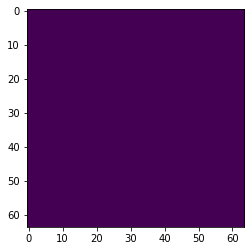

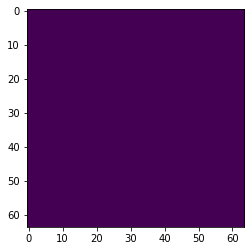

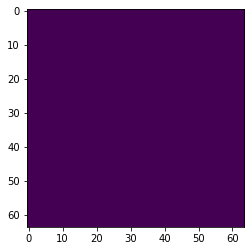

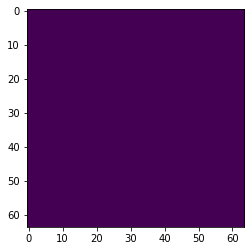

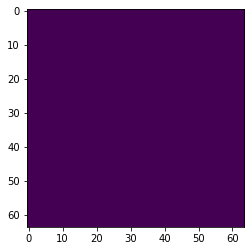

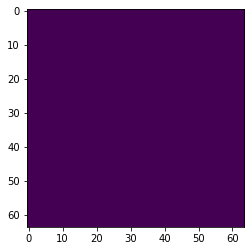

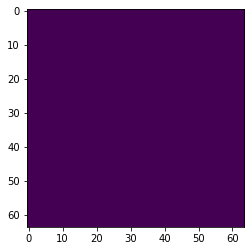

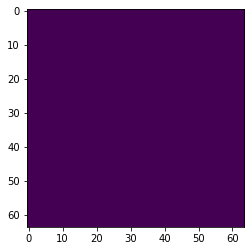

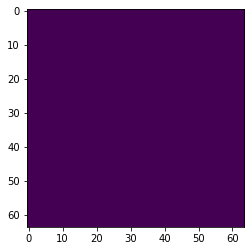

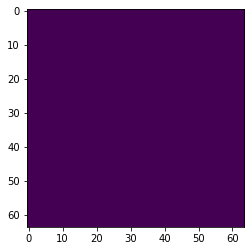

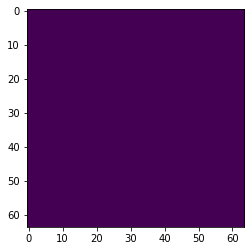

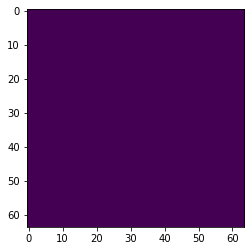

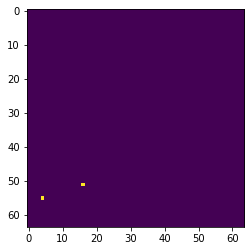

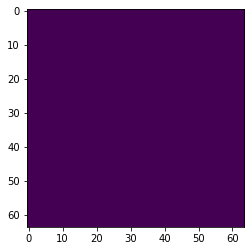

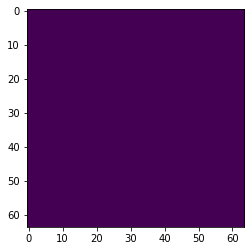

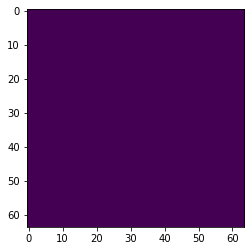

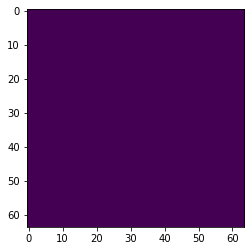

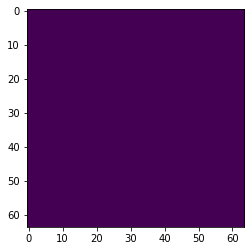

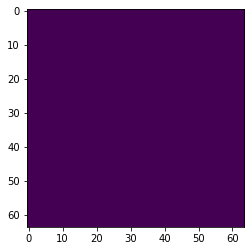

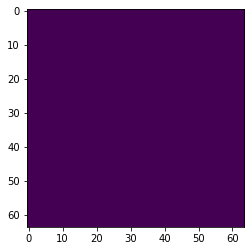

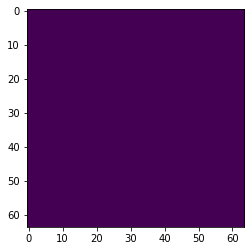

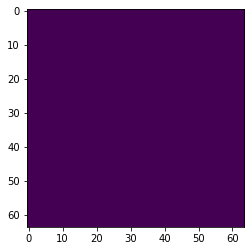

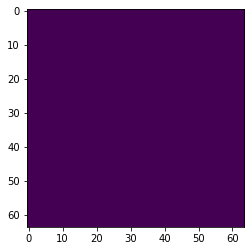

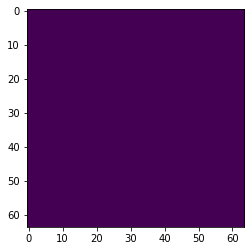

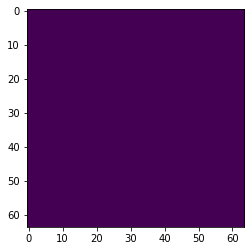

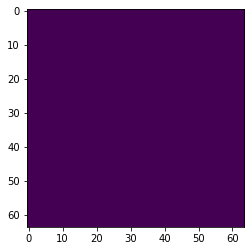

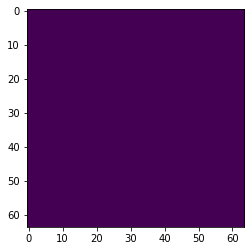

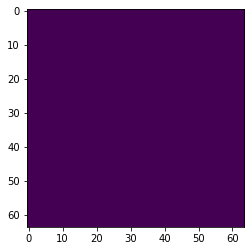

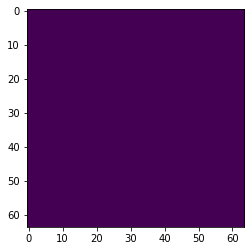

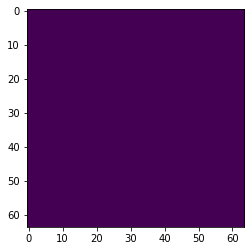

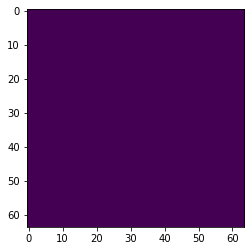

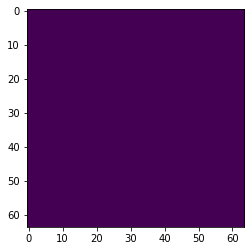

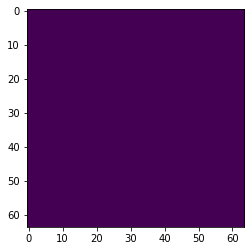

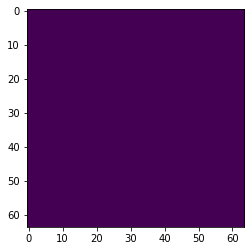

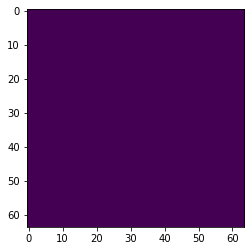

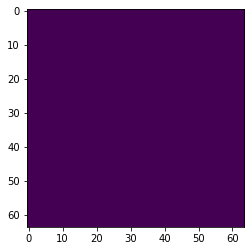

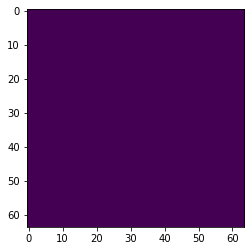

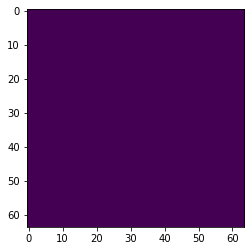

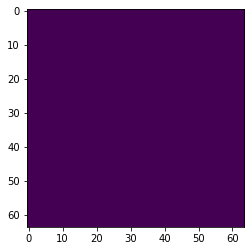

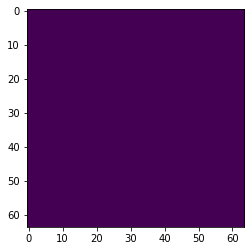

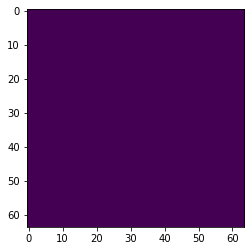

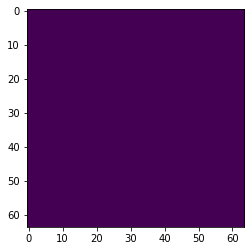

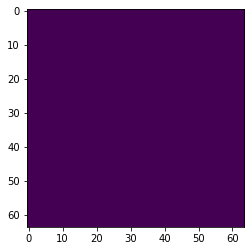

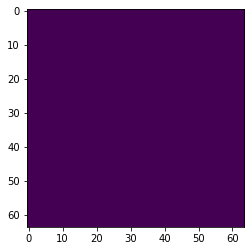

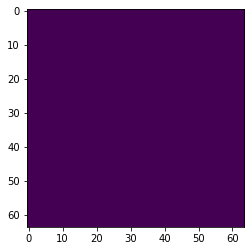

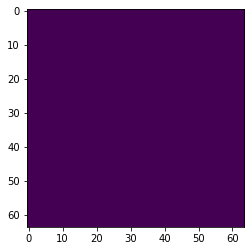

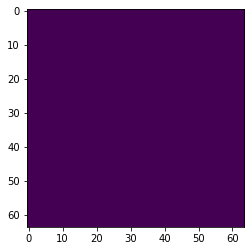

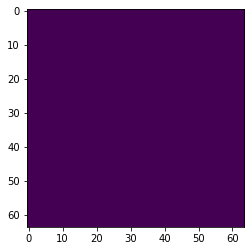

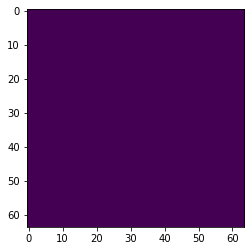

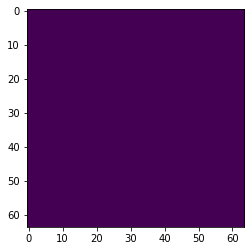

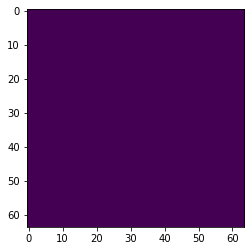

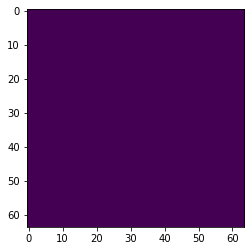

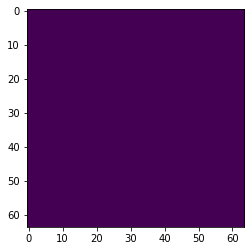

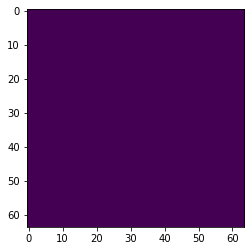

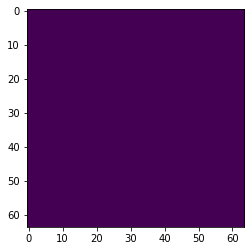

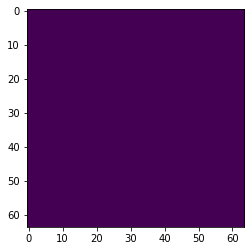

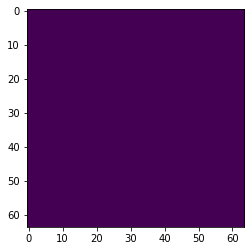

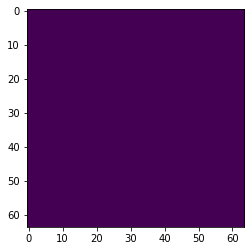

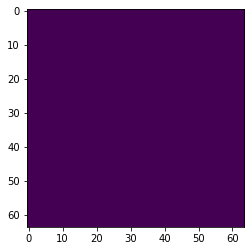

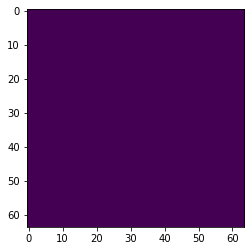

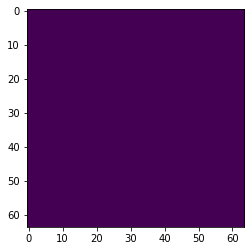

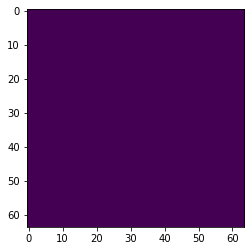

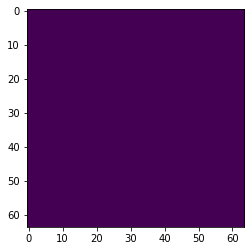

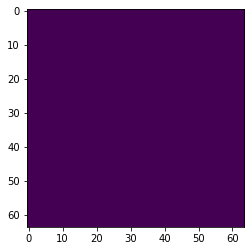

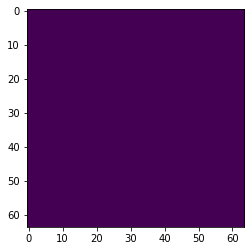

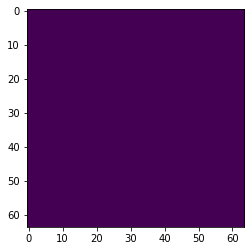

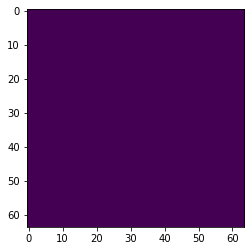

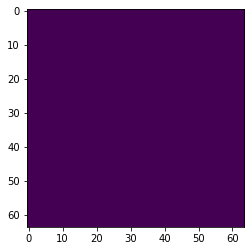

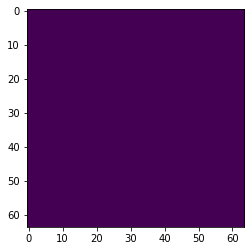

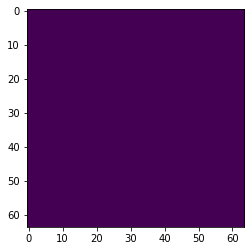

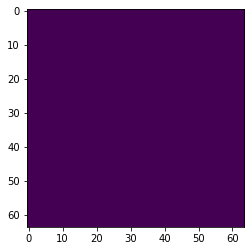

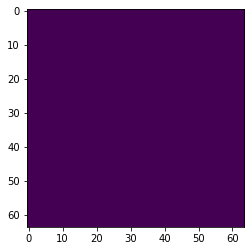

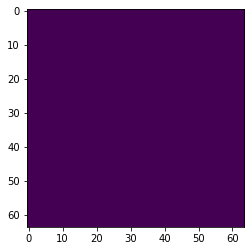

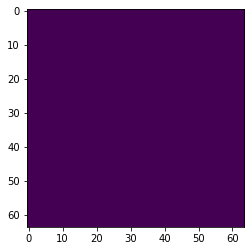

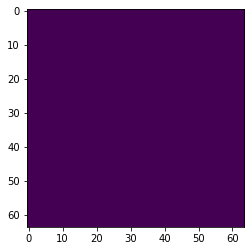

In [24]:
for i in range(91):
    plt.imshow(label_heatmap[idx][i])
    plt.show()

In [8]:
#batch_Img_resized, batch_Anno_Data, batch_Heatmap, gaussian_Heatmap, categories
idx = 0

batch_Img_resized's Shape :  (64, 256, 256, 3)


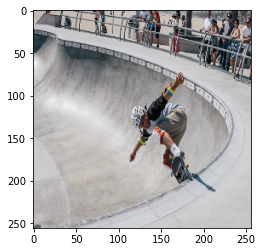

In [9]:
print("batch_Img_resized's Shape : ", np.shape(batch_Img_resized))
plt.imshow(batch_Img_resized[idx])
plt.show()

In [10]:
batch_Anno_Data[idx]

[[1, [282.16, 119.59, 170.59, 208.28]],
 [1, [577.71, 15.59, 30.92, 109.25]],
 [1, [488.11, 0.0, 36.37, 66.14]],
 [1, [349.48, 0.0, 25.9, 75.47]],
 [41, [406.25, 286.94, 58.41, 54.56]],
 [31, [405.91, 10.32, 23.91, 23.42]],
 [1, [590.38, 13.93, 49.62, 125.66]],
 [1, [552.73, 2.33, 36.26, 119.94]],
 [1, [539.33, 22.0, 19.49, 72.0]],
 [31, [199.01, 29.41, 18.96, 14.99]],
 [1, [310.52, 0.11, 27.86, 62.04]],
 [1, [426.56, 8.66, 22.02, 35.25]],
 [1, [334.96, 0.0, 23.21, 70.46]],
 [1, [290.76, 0.38, 24.18, 62.62]],
 [1, [513.19, 17.51, 30.34, 92.52]],
 [1, [171.25, 0.29, 24.44, 45.71]],
 [1, [192, 0, 428, 86]]]

Label Heatmap Shape :  (64, 91, 64, 64)
0


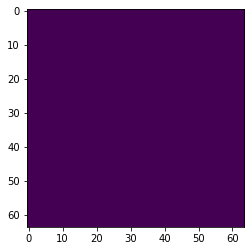

1


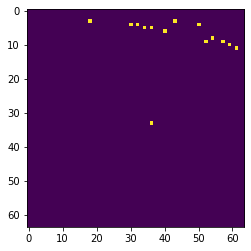

2


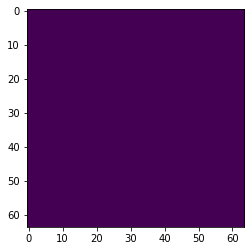

3


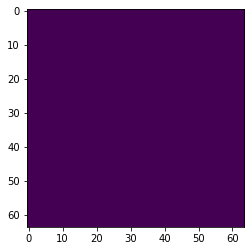

4


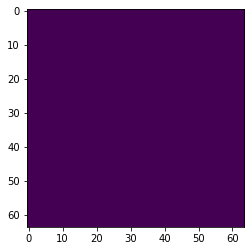

5


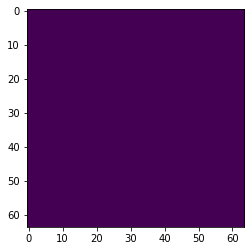

6


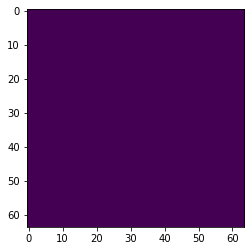

7


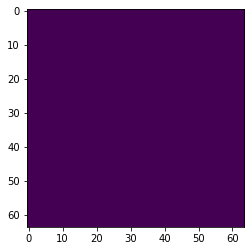

8


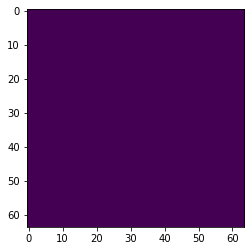

9


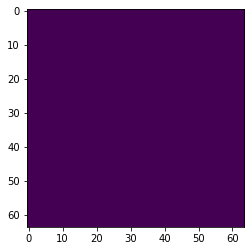

10


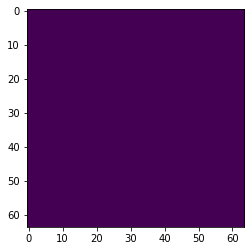

11


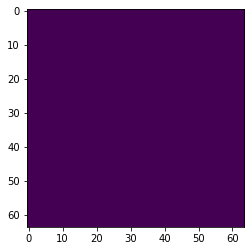

12


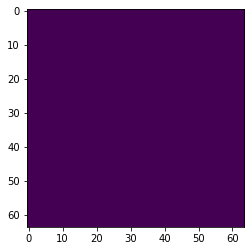

13


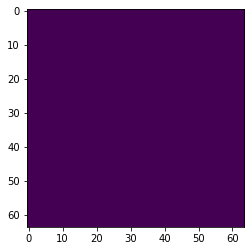

14


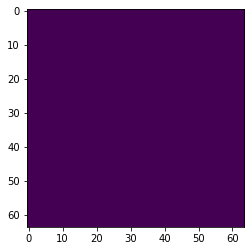

15


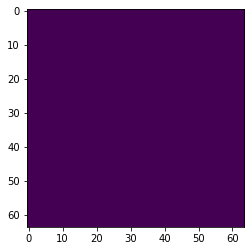

16


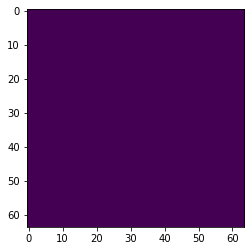

17


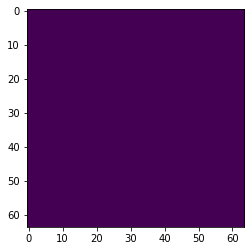

18


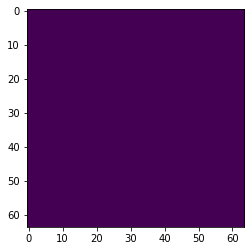

19


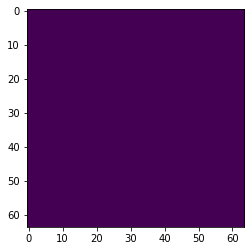

20


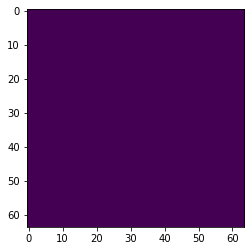

21


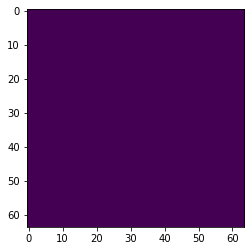

22


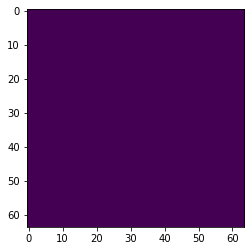

23


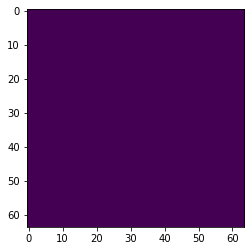

24


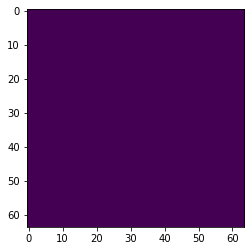

25


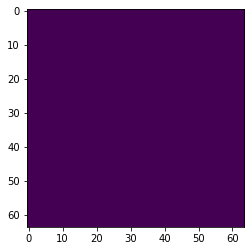

26


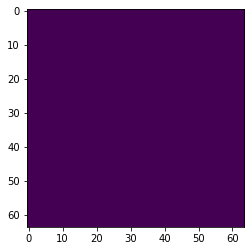

27


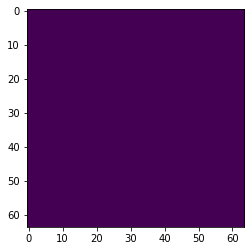

28


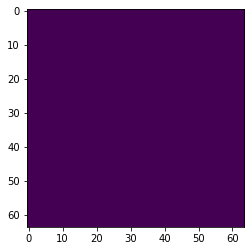

29


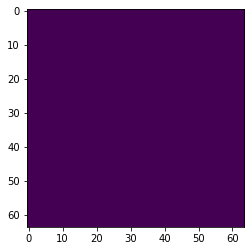

30


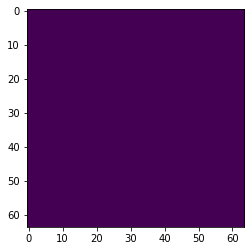

31


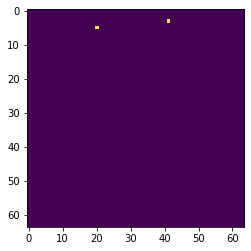

32


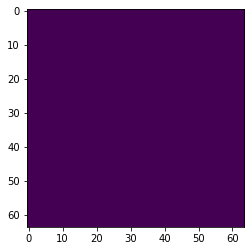

33


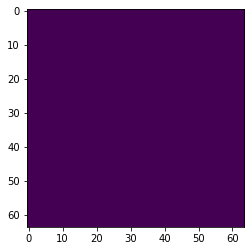

34


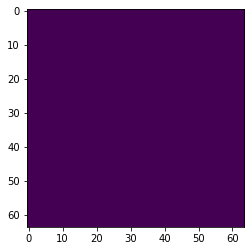

35


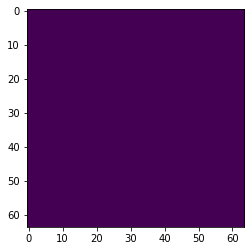

36


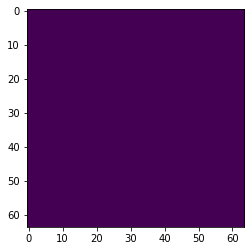

37


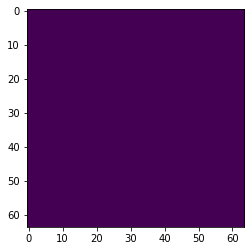

38


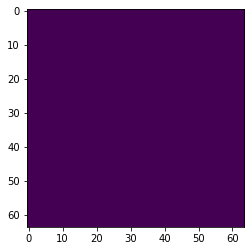

39


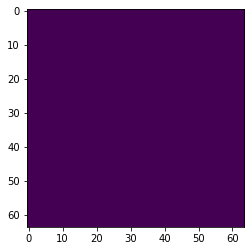

40


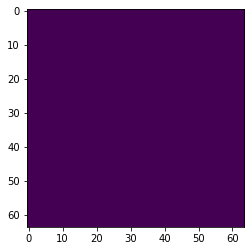

41


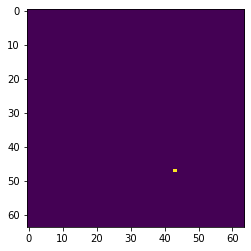

42


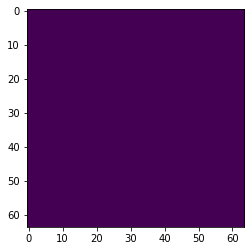

43


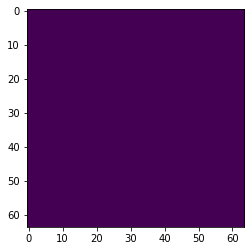

44


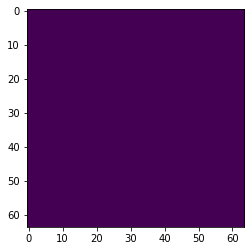

45


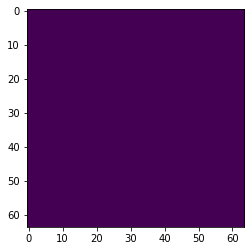

46


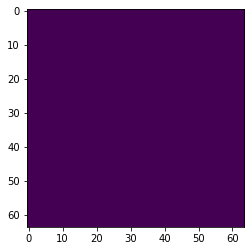

47


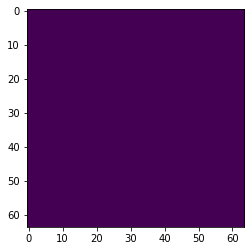

48


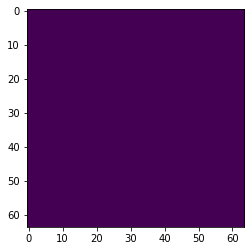

49


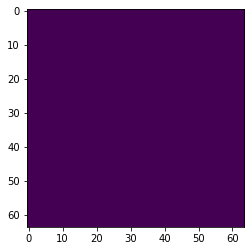

50


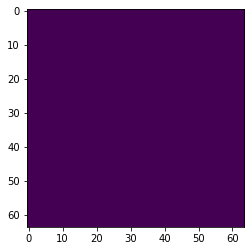

51


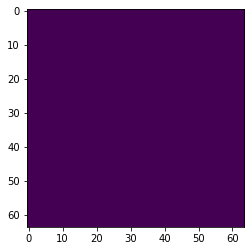

52


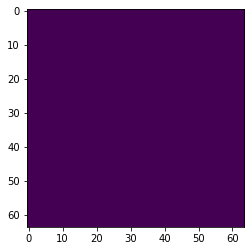

53


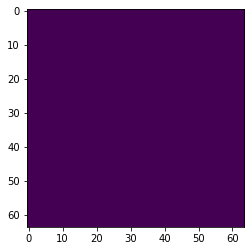

54


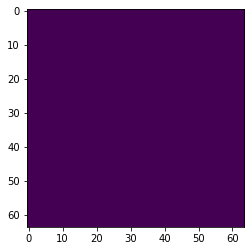

55


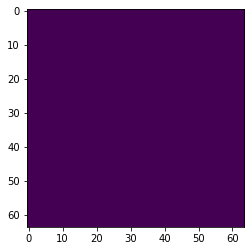

56


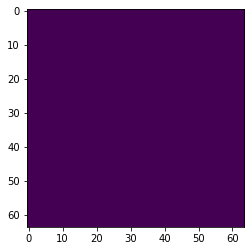

57


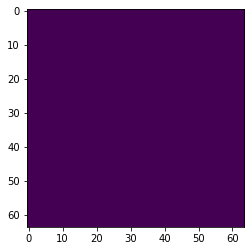

58


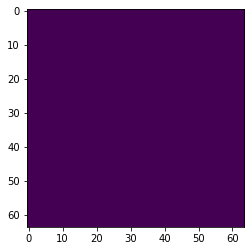

59


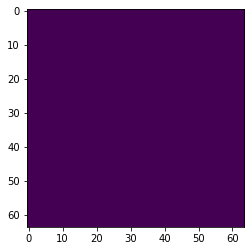

60


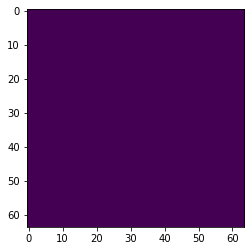

61


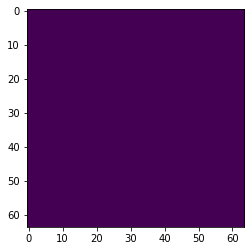

62


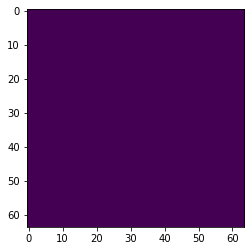

63


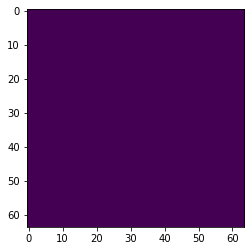

64


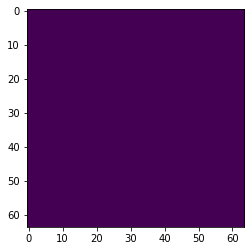

65


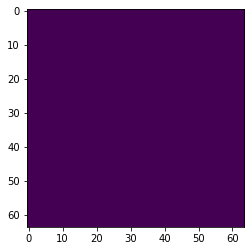

66


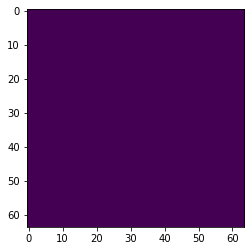

67


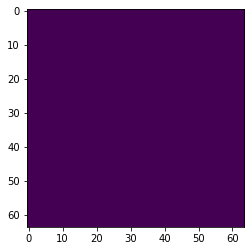

68


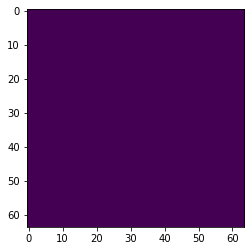

69


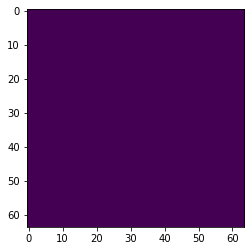

70


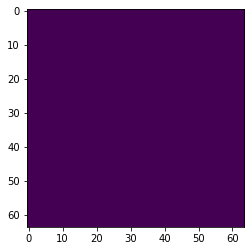

71


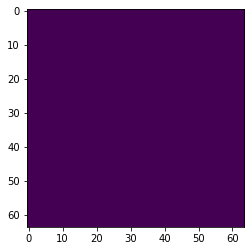

72


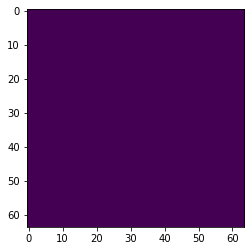

73


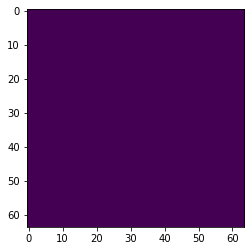

74


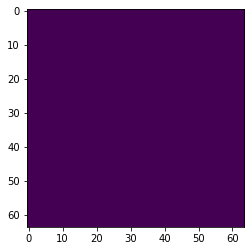

75


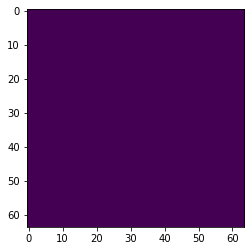

76


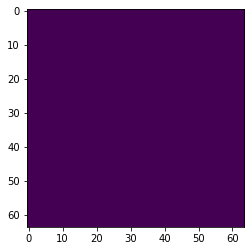

77


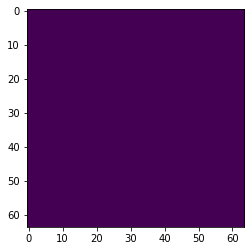

78


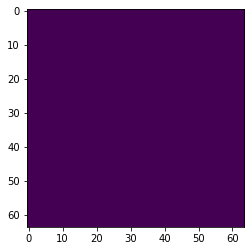

79


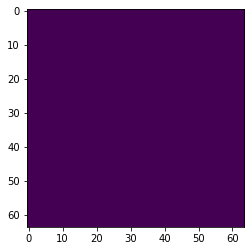

80


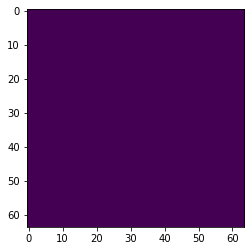

81


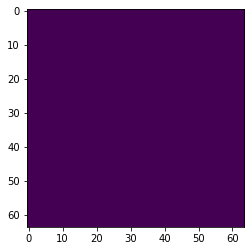

82


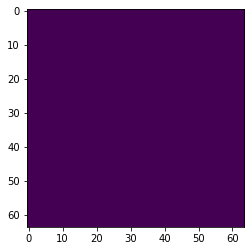

83


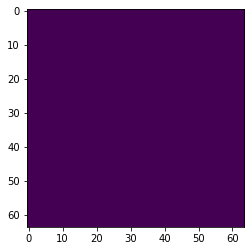

84


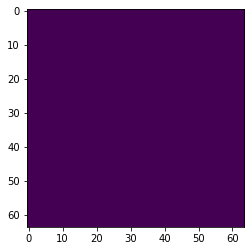

85


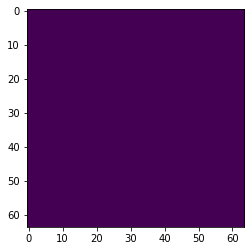

86


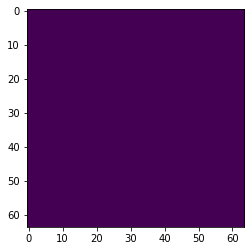

87


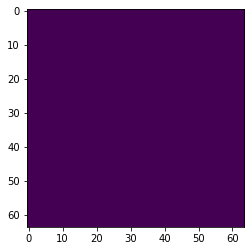

88


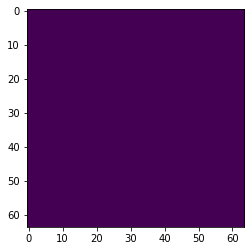

89


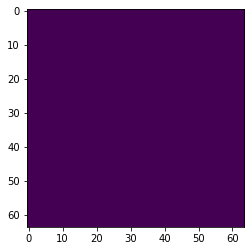

90


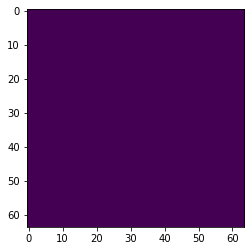

In [11]:
print("Label Heatmap Shape : ", np.shape(batch_Heatmap))
for i in range(91):
    print(i)
    plt.imshow(batch_Heatmap[idx][i])
    plt.show()

Label gaussian_Heatmap Shape :  (64, 91, 64, 64)
0


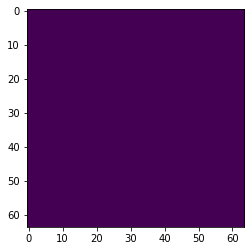

1


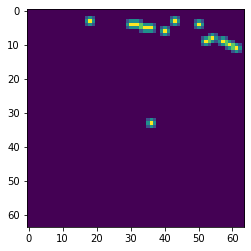

2


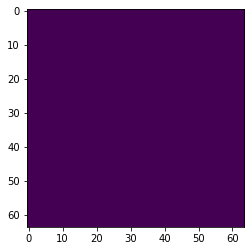

3


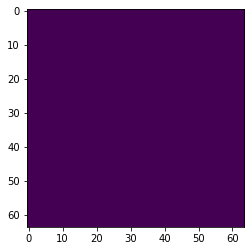

4


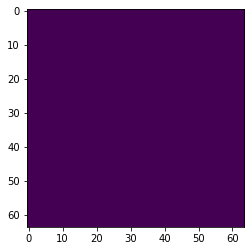

5


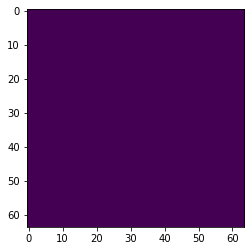

6


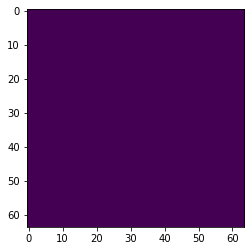

7


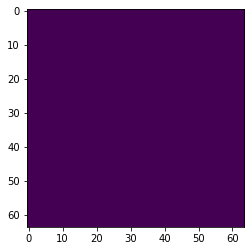

8


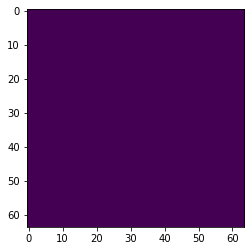

9


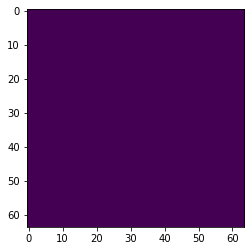

10


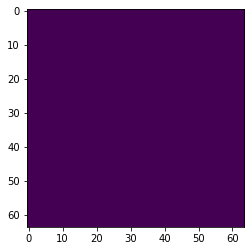

11


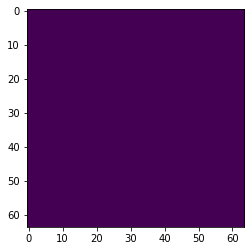

12


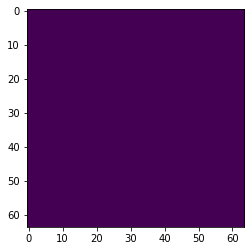

13


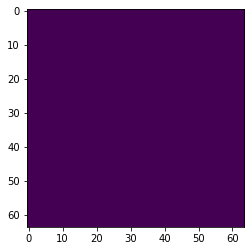

14


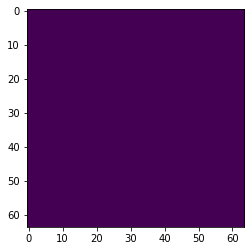

15


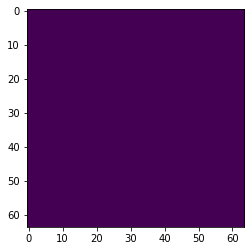

16


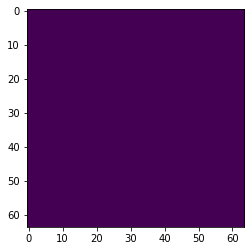

17


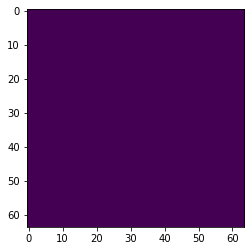

18


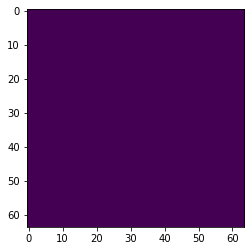

19


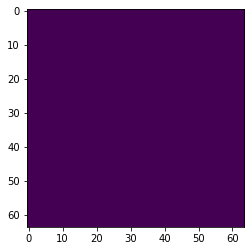

20


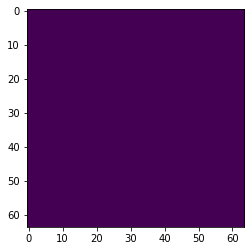

21


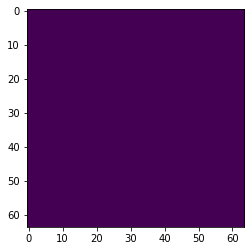

22


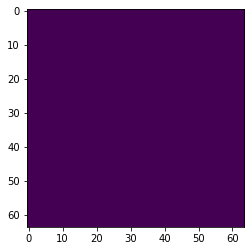

23


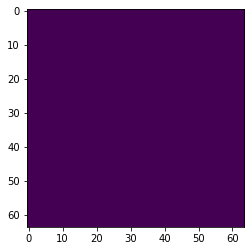

24


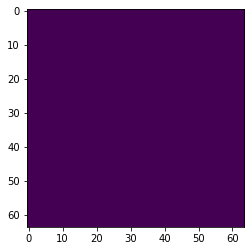

25


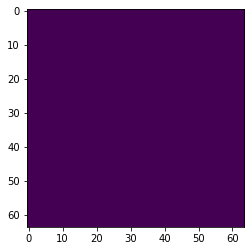

26


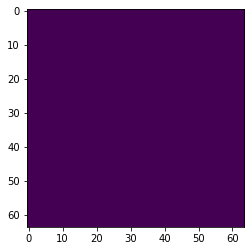

27


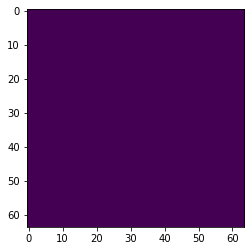

28


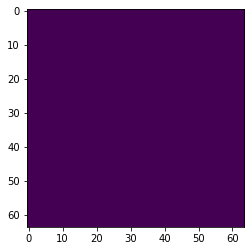

29


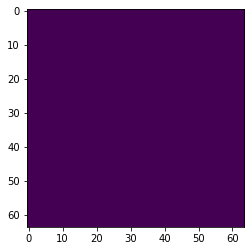

30


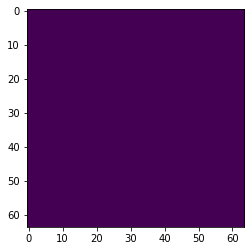

31


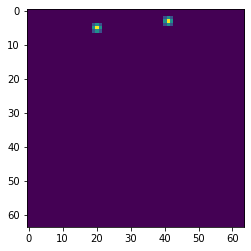

32


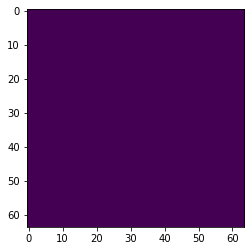

33


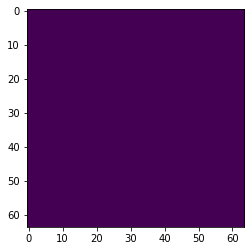

34


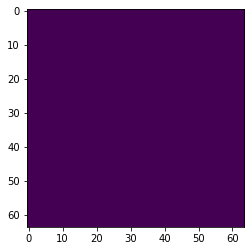

35


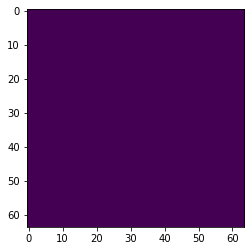

36


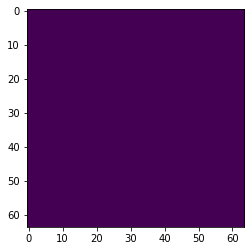

37


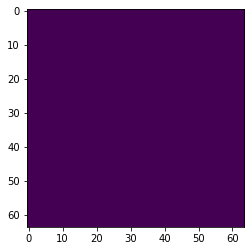

38


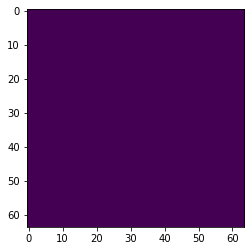

39


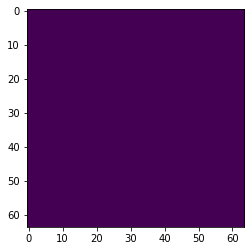

40


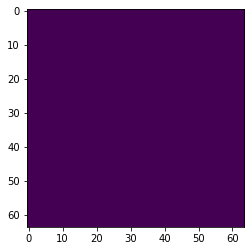

41


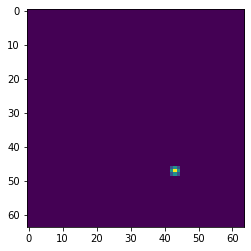

42


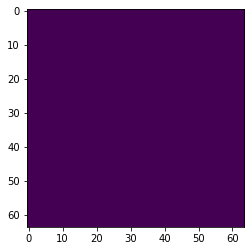

43


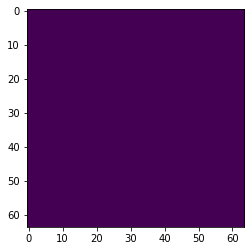

44


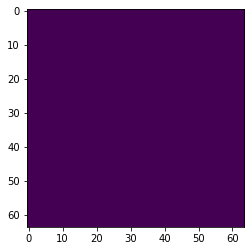

45


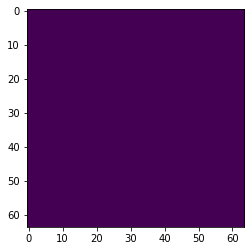

46


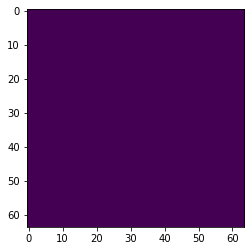

47


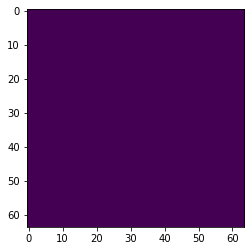

48


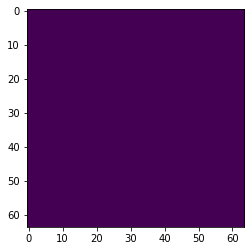

49


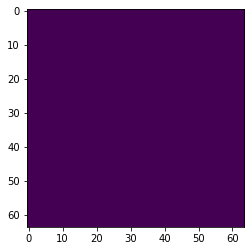

50


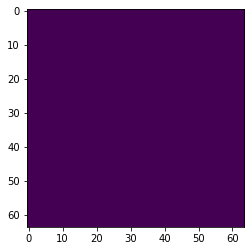

51


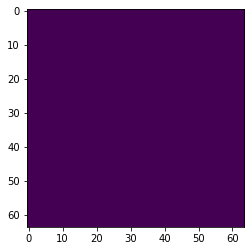

52


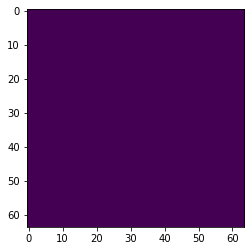

53


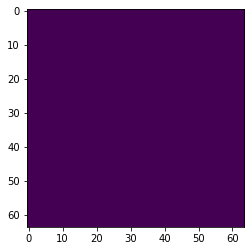

54


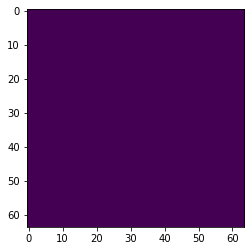

55


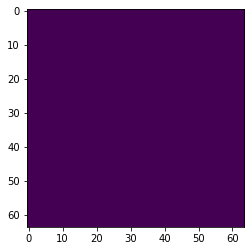

56


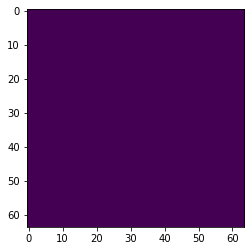

57


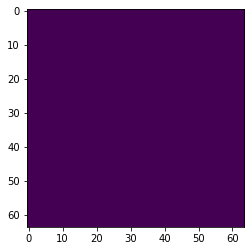

58


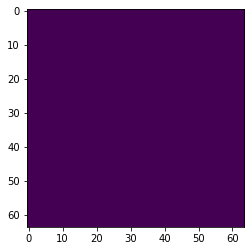

59


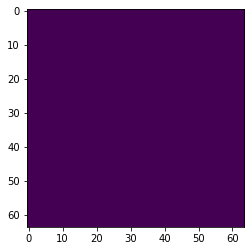

60


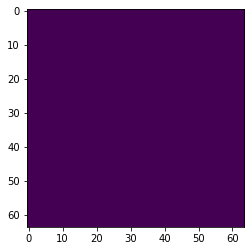

61


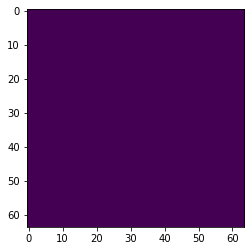

62


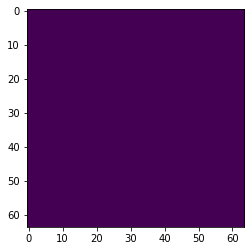

63


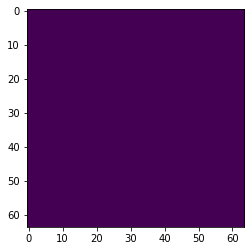

64


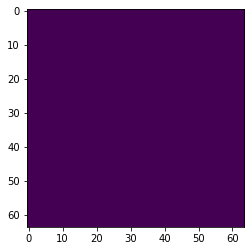

65


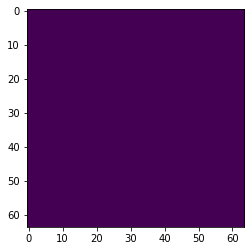

66


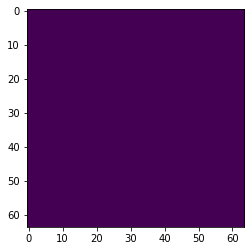

67


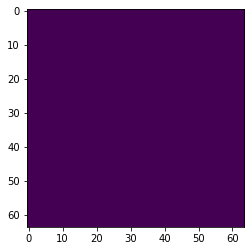

68


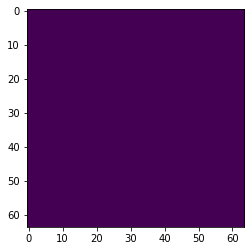

69


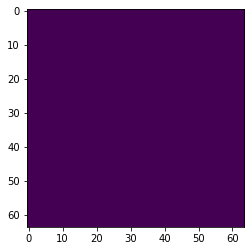

70


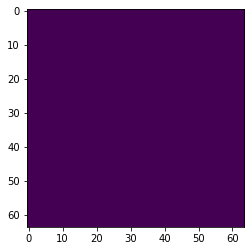

71


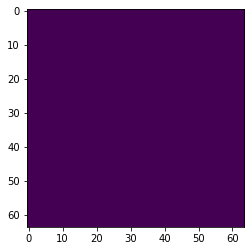

72


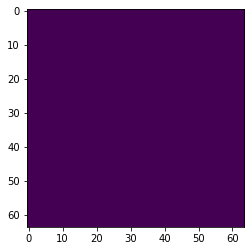

73


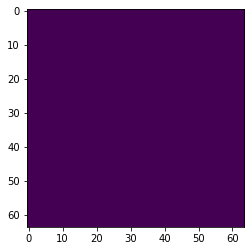

74


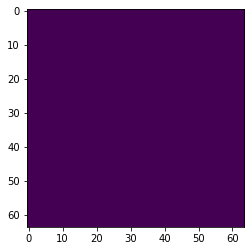

75


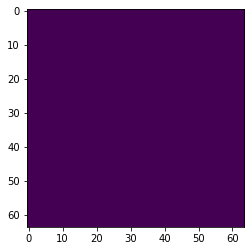

76


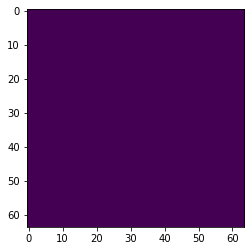

77


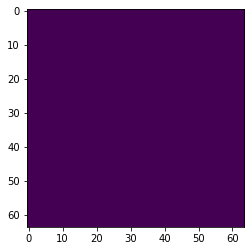

78


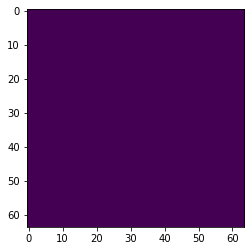

79


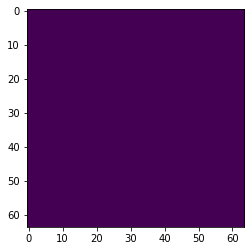

80


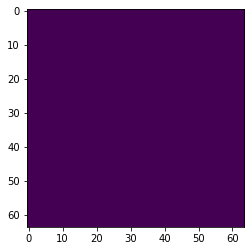

81


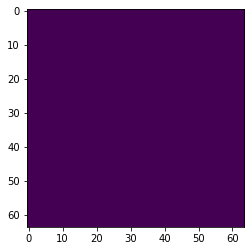

82


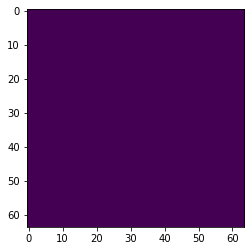

83


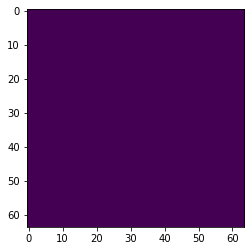

84


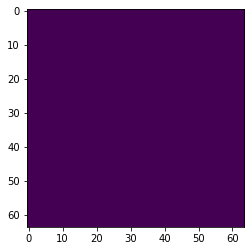

85


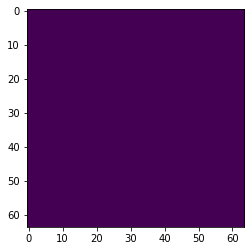

86


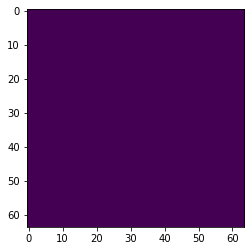

87


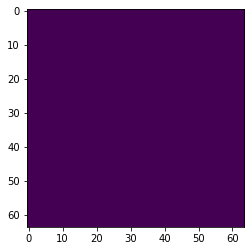

88


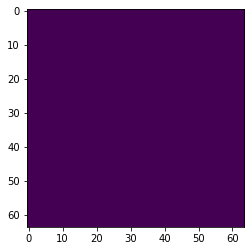

89


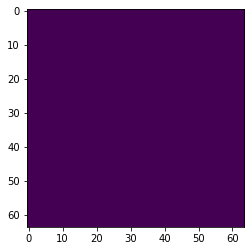

90


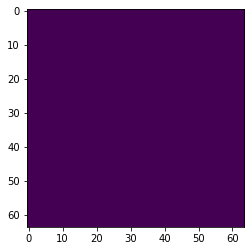

In [12]:
print("Label gaussian_Heatmap Shape : ", np.shape(gaussian_Heatmap))
for i in range(91):
    print(i)
    plt.imshow(gaussian_Heatmap[idx][i])
    plt.show()

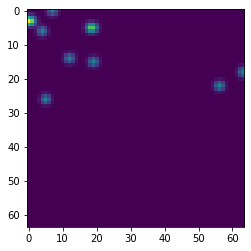

In [23]:
plt.imshow(gaussian_Heatmap[idx][37])
plt.show()

In [24]:
gaussian_Heatmap[idx][37].max()

0.35874352